# **Finding a Good Deal among Hotels in main German cities**

### **Introduction**

This dataset comprises hotel information from four major German cities: Berlin, Frankfurt, Hamburg, and Munich. The data was collected from the booking.com website and specifically includes hotels with available rooms for a selected night during weekdays.

It's important to note that not all hotels are listed on booking.com, which may introduce selection bias, as other hotels not listed on the site could potentially offer better deals. To mitigate this limitation, additional data from other sources would be beneficial. However, this case study focuses exclusively on data obtained from booking.com.

The dataset encompasses various types of accommodations, including hotels with available rooms for the selected night. It contains 1612 observations. The dataset variables provide comprehensive hotel information, such as hotel name, address, room price (in Euros), and more. For confidentiality reasons, hotel names and addresses have been replaced with numerical ID variables.


### **Goal of the Research**

The primary objective of this study is to analyze hotel data from key German cities, compare room prices, and identify good deals. The focus is on finding hotels that are underpriced relative to their location and quality.

### **Aknowledgement** 

I would like to acknowledge the authors Gabor Bekes and Gabor Kezdi for their book, "Data Analysis for Business, Economics, and Policy," published by Cambridge University Press in 2021. More resources can be found at gabors-data-analysis.com.

In [1]:
####################################################
# Import packages
####################################################
import numpy as np
import numpy.typing as npt
import pandas as pd
from plotnine import *
from mizani.formatters import percent_format
from plotnine import ggplot, aes, geom_point
import matplotlib.pyplot as plt
import seaborn as sns

####################################################
# Define global vars
####################################################
color = ["#3a5e8cFF", "#10a53dFF", "#541352FF", "#ffcf20FF", "#2f9aa0FF"]

dark_gray = ".4"
light_gray = ".8"

da_theme = {
    "axes.edgecolor": dark_gray,
    "axes.facecolor": "white",
    "axes.linewidth": 1,
    "axes.spines.bottom": True,
    "axes.spines.left": True,
    "axes.spines.right": True,
    "axes.spines.top": True,
    "font.family": "sans-serif",
    "figure.figsize": (7, 5.5),
    "grid.color": light_gray,
    "grid.linestyle": "-",
    "text.color": "black",
    "xtick.bottom": True,
    "xtick.color": dark_gray,
    "ytick.color": dark_gray,
}

####################################################
# Define helper functions
####################################################
def seq(start: float, stop: float, by: float, round_n=3) -> list:
    """
    Custom function, used for setting the breaks of plotnine scales.

       Parameters
    ----------
    start : float
        Start of the breaks.
    stop : float
        End of the breaks.
    by : float
        Steps between breaks.
    round_n: int, default=3
        Decimals to round floats in output.
    """
    epsilon = np.finfo("float").eps

    return [
        round(x, round_n) for x in list(np.arange(start, stop + (by - epsilon), by))
    ]

import statsmodels.api as sm
import statsmodels.formula.api as smf

## Opening the data file

In [3]:
hotel_data = pd.read_csv('/.../hotels_Germany.csv')

# **PART I. Exploratory Data Analysis**

## **Table 1.** List of observations

In [5]:
hotel_data

,hotel_id,city,check_in,check_out,breakfast_0_1,accommadation_type,distance_km,Sustain_cert,reviews_0_10,nr_reviews,Price_euro
0,1,Berlin,2/5/2025,2/6/2025,0,Hotel,2.9,0,8.2,3159,117
1,2,Berlin,2/5/2025,2/6/2025,0,Hotel,17.3,0,8.6,6049,72
2,3,Berlin,2/5/2025,2/6/2025,0,Hotel,7.4,0,8.7,44,155
3,4,Berlin,2/5/2025,2/6/2025,0,Pension,4.5,0,7.4,669,62
4,5,Berlin,2/5/2025,2/6/2025,0,Hotel,3.9,0,8.5,23837,122
...,...,...,...,...,...,...,...,...,...,...,...
1608,1609,München,2/10/2025,2/11/2025,0,Ferienwohnung,0.7,0,7.7,14,1350
1609,1610,München,2/10/2025,2/11/2025,0,Pension,6.9,0,5.7,3,288
1610,1611,München,2/10/2025,2/11/2025,0,Ferienwohnung,1.4,0,1.0,2,800
1611,1612,München,2/10/2025,2/11/2025,0,Ferienwohnung,1.3,0,3.3,6,900


## **Table 2.** List of variables

In [7]:
hotel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1613 entries, 0 to 1612
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   hotel_id            1613 non-null   int64  
 1   city                1613 non-null   object 
 2   check_in            1613 non-null   object 
 3   check_out           1613 non-null   object 
 4   breakfast_0_1       1613 non-null   int64  
 5   accommadation_type  1612 non-null   object 
 6   distance_km         1613 non-null   float64
 7   Sustain_cert        1613 non-null   int64  
 8   reviews_0_10        1613 non-null   float64
 9   nr_reviews          1613 non-null   int64  
 10  Price_euro          1613 non-null   int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 138.7+ KB


## **Table 3.** Number of observations by cities

In [9]:
hotel_data['city'].value_counts()

city
Berlin       472
Hamburg      441
München      410
Frankfurt    290
Name: count, dtype: int64

## **Table 4.** Distribution of accommadation types

In [11]:
hotel_data['accommadation_type'].value_counts()

accommadation_type
Hotel                  1107
Ferienwohnung           227
Aparthotel              120
Hostel                   63
Pension                  55
Privatzimmer             25
Bed & Breakfast           3
Ferienhaus                3
Gasthaus                  2
Motel                     2
Boot                      2
die Zeit-Lodge            2
Studentenunterkunft       1
Name: count, dtype: int64

### * *For the consistent analysis I focus only hotels and apartment-hotels*

In [13]:
hotel_data = hotel_data[(hotel_data['accommadation_type'] == 'Hotel') | (hotel_data['accommadation_type'] == 'Aparthotel')]
hotel_data['accommadation_type'].value_counts()

accommadation_type
Hotel         1107
Aparthotel     120
Name: count, dtype: int64

### * *After keeping only hotels and apartment-hotels 1227 observations left*

## **Figure 1.** a) Distance from hotel to city center, in km
### * *I chose distance as first independent variable for price regression analysis. Later I add other variables to regression analysis*

In [15]:
hotel_data['distance_km'].agg(['min', 'mean', 'max'])

min      0.040000
mean     4.138215
max     26.900000
Name: distance_km, dtype: float64

/opt/anaconda3/lib/python3.12/site-packages/plotnine/layer.py:284: PlotnineWarning: stat_bin : Removed 7 rows containing non-finite values.


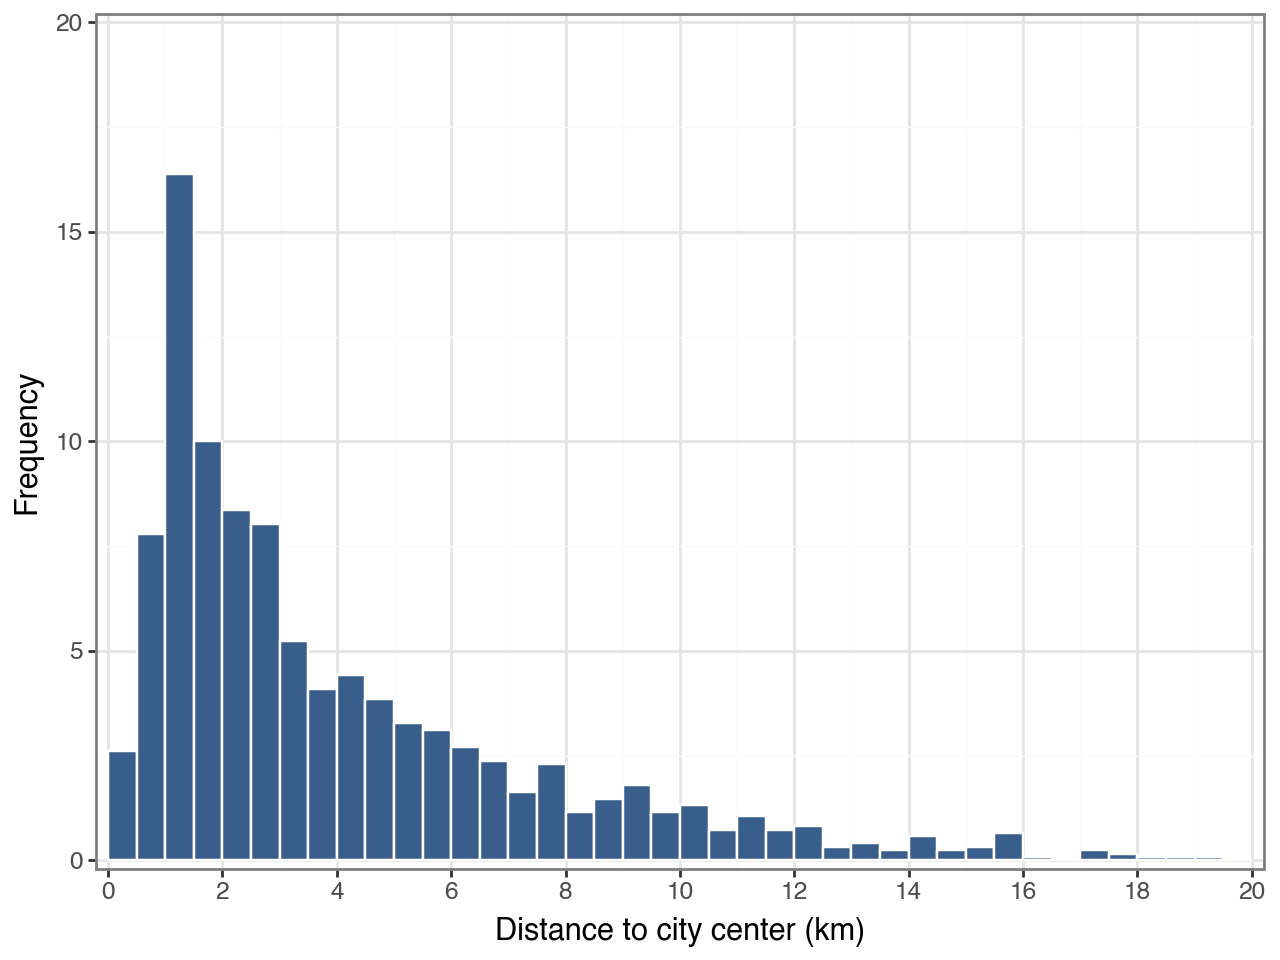

In [17]:
(
    ggplot(hotel_data, aes(x="distance_km"))
    + geom_histogram(
        aes(y=after_stat("count / sum(count)*100")),
        binwidth=0.5,
        fill=color[0],
        color="white",
        boundary=0,
        closed="left",
    )
    + labs(x="Distance to city center (km)", y="Frequency")
    + expand_limits(x=0.01, y=0.01)
    + scale_x_continuous(expand=[0.01, 0.01], limits=[0, 20], breaks=np.arange(0, 21, 2))
    + scale_y_continuous(expand=[0.01, 0.01], limits=[0, 20], breaks=np.arange(0, 21, 5))
    + theme_bw()
)

### * *I restrict the distance to 10 km, assuming that the maximum distance from a hotel to the city center should not exceed 10 km.*

In [19]:
hotel_data = hotel_data.loc[
    (hotel_data["distance_km"] <= 10)
]

## **Figure 1.** b) Distance from hotel to city center, in km
### * *Distribution after restricting to 10 km*

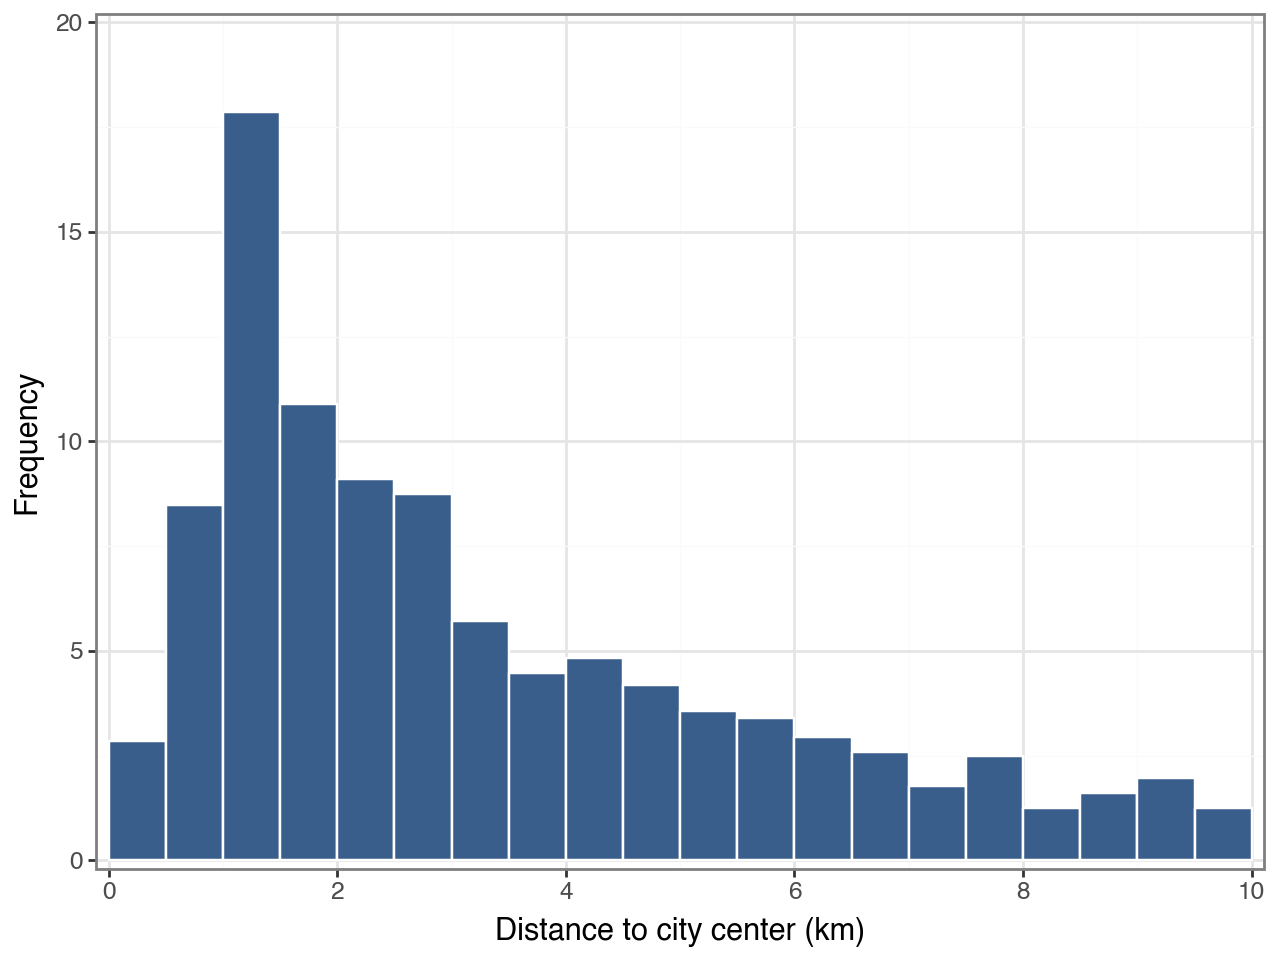

In [21]:
(
    ggplot(hotel_data, aes(x="distance_km"))
    + geom_histogram(
        aes(y=after_stat("count / sum(count)*100")),
        binwidth=0.5,
        fill=color[0],
        color="white",
        boundary=0,
        closed="left",
    )
    + labs(x="Distance to city center (km)", y="Frequency")
    + expand_limits(x=0.01, y=0.01)
    + scale_x_continuous(expand=[0.01, 0.01], limits=[0, 10], breaks=np.arange(0, 11, 2))
    + scale_y_continuous(expand=[0.01, 0.01], limits=[0, 20], breaks=np.arange(0, 21, 5))
    + theme_bw()
)

### * *After keeping hotels within a 10 km radius of the city center, 1122 observations left*

In [43]:
hotel_data

,hotel_id,city,check_in,check_out,breakfast_0_1,accommadation_type,distance_km,Sustain_cert,reviews_0_10,nr_reviews,Price_euro
0,1,Berlin,2/5/2025,2/6/2025,0,Hotel,2.90,0,8.2,3159,117
2,3,Berlin,2/5/2025,2/6/2025,0,Hotel,7.40,0,8.7,44,155
4,5,Berlin,2/5/2025,2/6/2025,0,Hotel,3.90,0,8.5,23837,122
8,9,Berlin,2/5/2025,2/6/2025,0,Hotel,3.80,0,8.4,7916,160
9,10,Berlin,2/5/2025,2/6/2025,0,Hotel,5.60,1,8.3,9294,140
...,...,...,...,...,...,...,...,...,...,...,...
1591,1592,München,2/10/2025,2/11/2025,0,Hotel,1.10,1,9.1,783,520
1592,1593,München,2/10/2025,2/11/2025,0,Hotel,0.04,0,9.4,611,525
1594,1595,München,2/10/2025,2/11/2025,0,Hotel,0.90,0,9.0,80,539
1597,1598,München,2/10/2025,2/11/2025,0,Aparthotel,0.60,0,9.1,60,250


### * *For the better analysis I create a new categorical review variable from existing review variable*

In [45]:
# Define a function to recode the values
def recode_reviews(x):
    if x >= 0 and x < 0.5:
        return 0
    elif x >= 0.5 and x < 1.5:
        return 1
    elif x >= 1.5 and x < 2.5:
        return 2
    elif x >= 2.5 and x < 3.5:
        return 3
    elif x >= 3.5 and x < 4.5:
        return 4
    elif x >= 4.5 and x < 5.5:
        return 5
    elif x >= 5.5 and x < 6.5:
        return 6
    elif x >= 6.5 and x < 7.5:
        return 7
    elif x >= 7.5 and x < 8.5:
        return 8
    elif x >= 8.5 and x < 9.5:
        return 9
    else:
        return 10

# Apply the function to create a new column 'review_category'
hotel_data['review_category'] = hotel_data['reviews_0_10'].apply(recode_reviews)

/var/folders/h3/p7wl5qls22b6g1rct6ljfgvc0000gn/T/ipykernel_77590/3328718210.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [47]:
hotel_data['review_category'].value_counts()

review_category
8     574
9     307
7     175
6      41
5      17
4       6
10      2
Name: count, dtype: int64

## **Figure 2.** Histogram of hotel reviews. Relative frequency (percent)

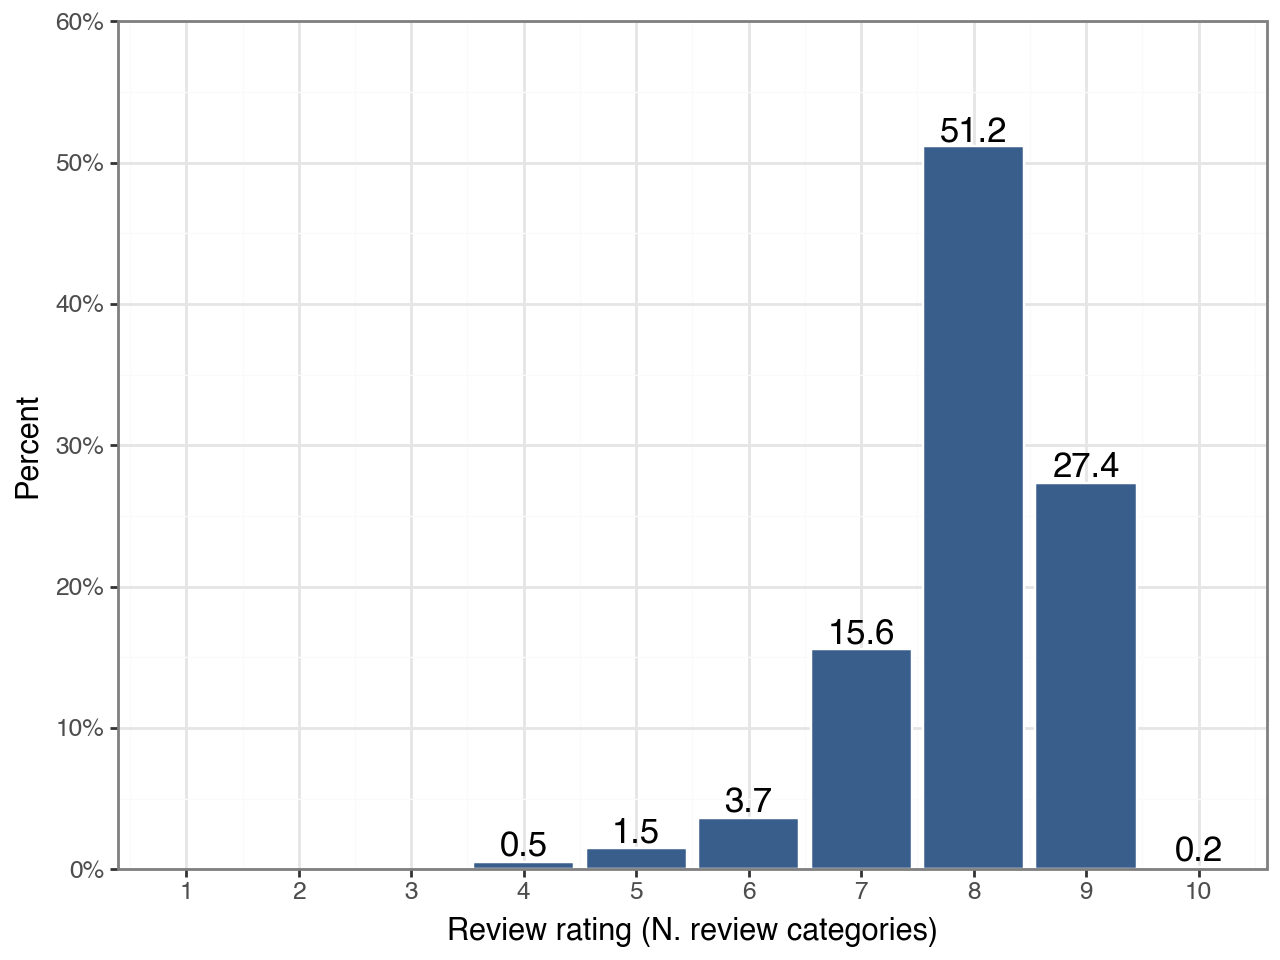

In [49]:
(
    ggplot(hotel_data, aes(x="review_category", y="stat(count)/sum(stat(count))"))
    + geom_bar(color="white", fill=color[0], alpha=0.8)
    + labs(x="Review rating (N. review categories)", y="Percent")
    + expand_limits(x=0.01, y=0.01)
    + scale_x_continuous(expand=[0.01, 0.01], limits=[0.5, 10.5], breaks=seq(1, 10.5, 1))
    + scale_y_continuous(
        expand=[0.00, 0.00],
        limits=[0, 0.6],
        breaks=seq(0, 0.51, 0.1),
        labels=percent_format(),
    )
    + geom_text(
        aes(
            x="review_category",
            y="[x+0.01 for x in stat(count)/sum(stat(count))]",
            label="[round(num,1) for num in stat(count)/sum(stat(count))*100)]",
        ),
        stat="count",
        size=12.5,
    )
    + theme_bw()
)

## **Figure 3.** a) Histogram of hotel price (in Euro)
### * *In Figure 3 (a, b, c and d) I use scaling tro better visualize price distributions)*

In [54]:
hotel_data['Price_euro'].agg(['min', 'mean', 'max'])

min      11.000000
mean    127.505348
max     800.000000
Name: Price_euro, dtype: float64

/opt/anaconda3/lib/python3.12/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_histogram : Removed 2 rows containing missing values.


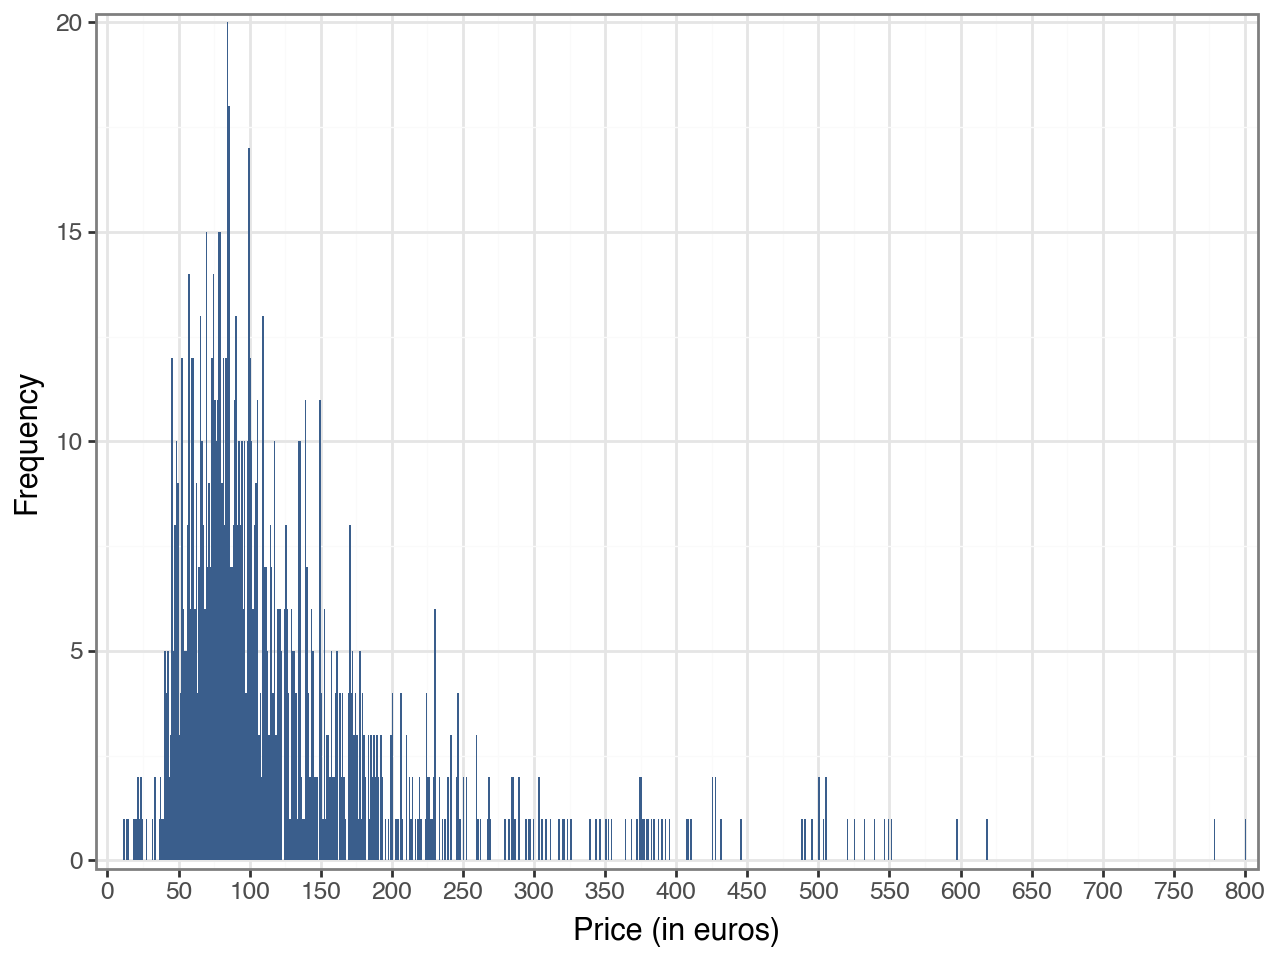

In [62]:
(
    ggplot(hotel_data, aes(x="Price_euro"))
    + geom_histogram(
        aes(y=after_stat("count / sum(count)")),
        binwidth=1,
        size=0.5
    )
    + geom_histogram(
        binwidth=1, fill=color[0], size=0.5, alpha=0.8, boundary=0, closed="left"
    )
    + labs(x="Price (in euros)", y="Frequency")
    + scale_x_continuous(expand=[0.01, 0.01], limits=[0, 801], breaks=np.arange(0, 801, 50))
    + scale_y_continuous(expand=[0.01, 0.01])
    + theme_bw()
)


## **Figure 3.** b) Histogram of hotel price (in Euro)

/opt/anaconda3/lib/python3.12/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_histogram : Removed 1 rows containing missing values.


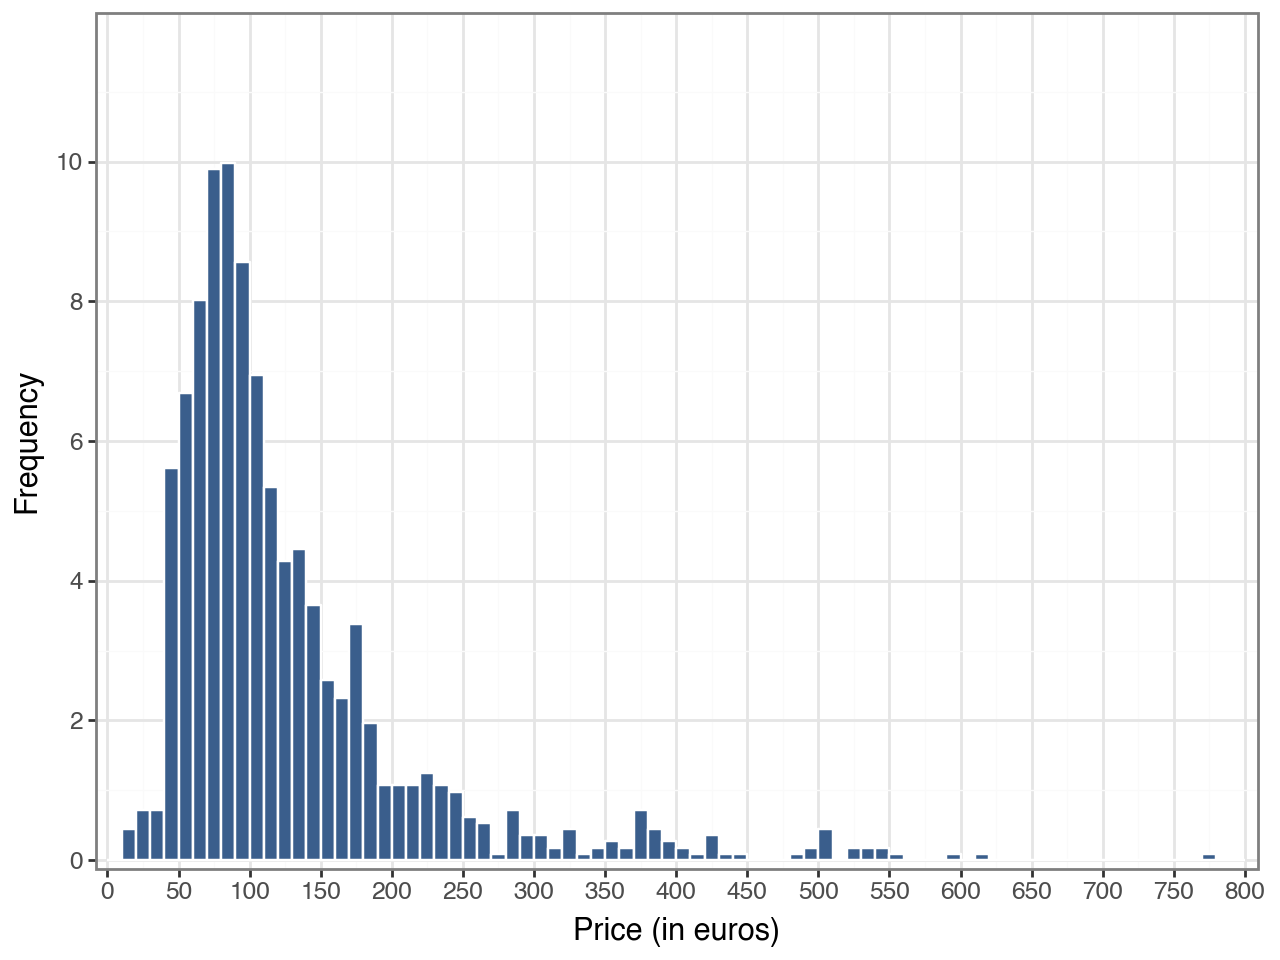

In [64]:
(
    ggplot(hotel_data, aes(x="Price_euro"))
    + geom_histogram(
        aes(y=after_stat("count / sum(count)*100")),
        binwidth=10,
        fill=color[0],
        color="white",
        boundary=0,
        closed="left",
    )
    + labs(x="Price (in euros)", y="Frequency")
    + expand_limits(x=0.01, y=0.01)
    + scale_x_continuous(expand=[0.01, 0.01], limits=[0, 801], breaks=np.arange(0, 801, 50))
    + scale_y_continuous(expand=[0.01, 0.01], limits=[0, 12], breaks=np.arange(0, 12, 2))
    + theme_bw()
)


## **Figure 3.** c) Histogram of hotel price (in Euro)

/opt/anaconda3/lib/python3.12/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_histogram : Removed 1 rows containing missing values.


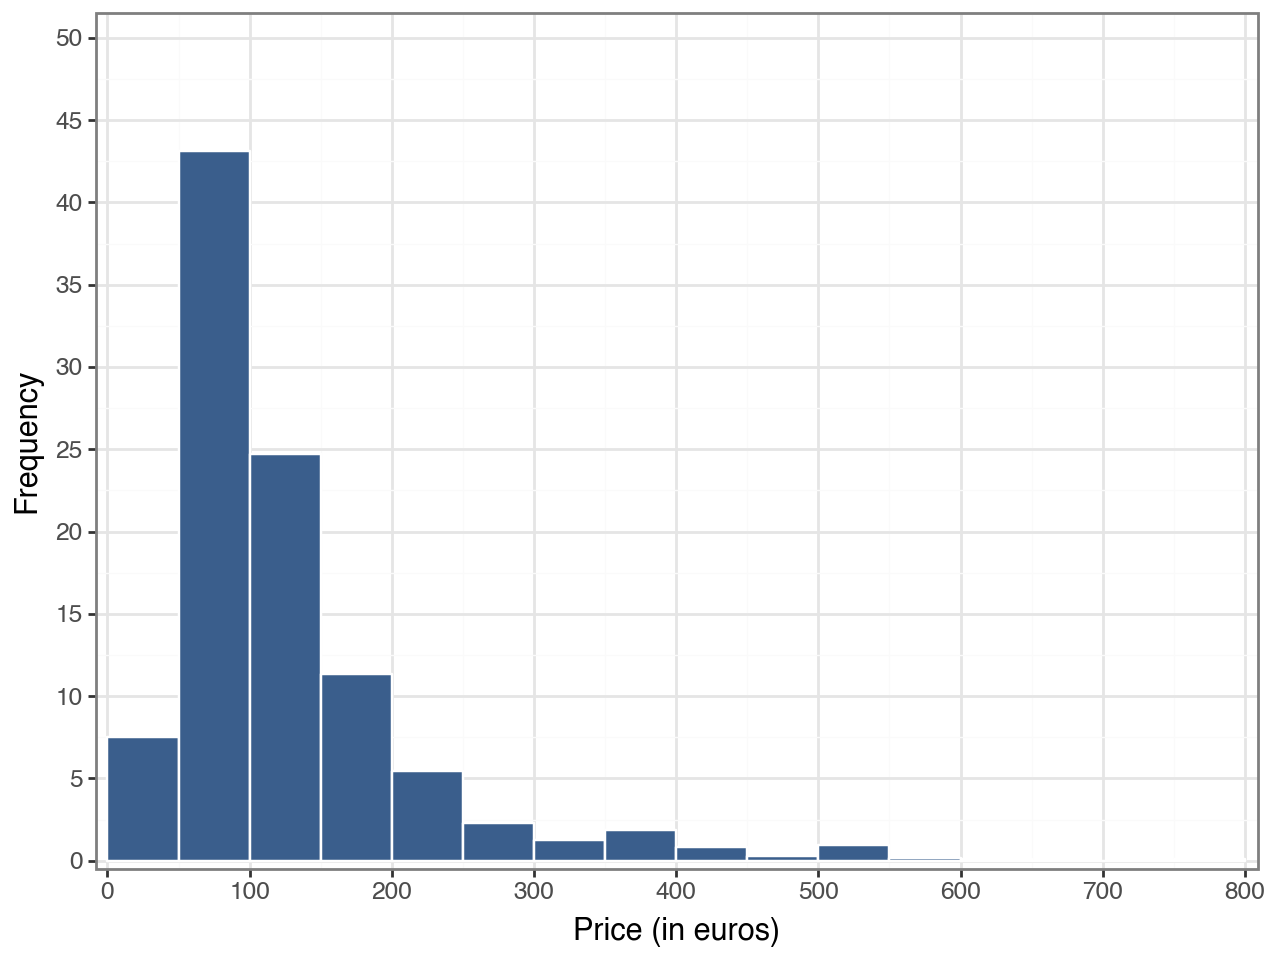

In [66]:
(
    ggplot(hotel_data, aes(x="Price_euro"))
    + geom_histogram(
        aes(y=after_stat("count / sum(count)*100")),
        binwidth=50,
        fill=color[0],
        color="white",
        boundary=0,
        closed="left",
    )
    + labs(x="Price (in euros)", y="Frequency")
    + expand_limits(x=0.01, y=0.01)
    + scale_x_continuous(expand=[0.01, 0.01], limits=[0, 801], breaks=np.arange(0, 801, 100))
    + scale_y_continuous(expand=[0.01, 0.01], limits=[0, 51], breaks=np.arange(0, 51, 5))
    + theme_bw()
)

## **Figure 3.** d) Histogram of hotel price (in Euro)

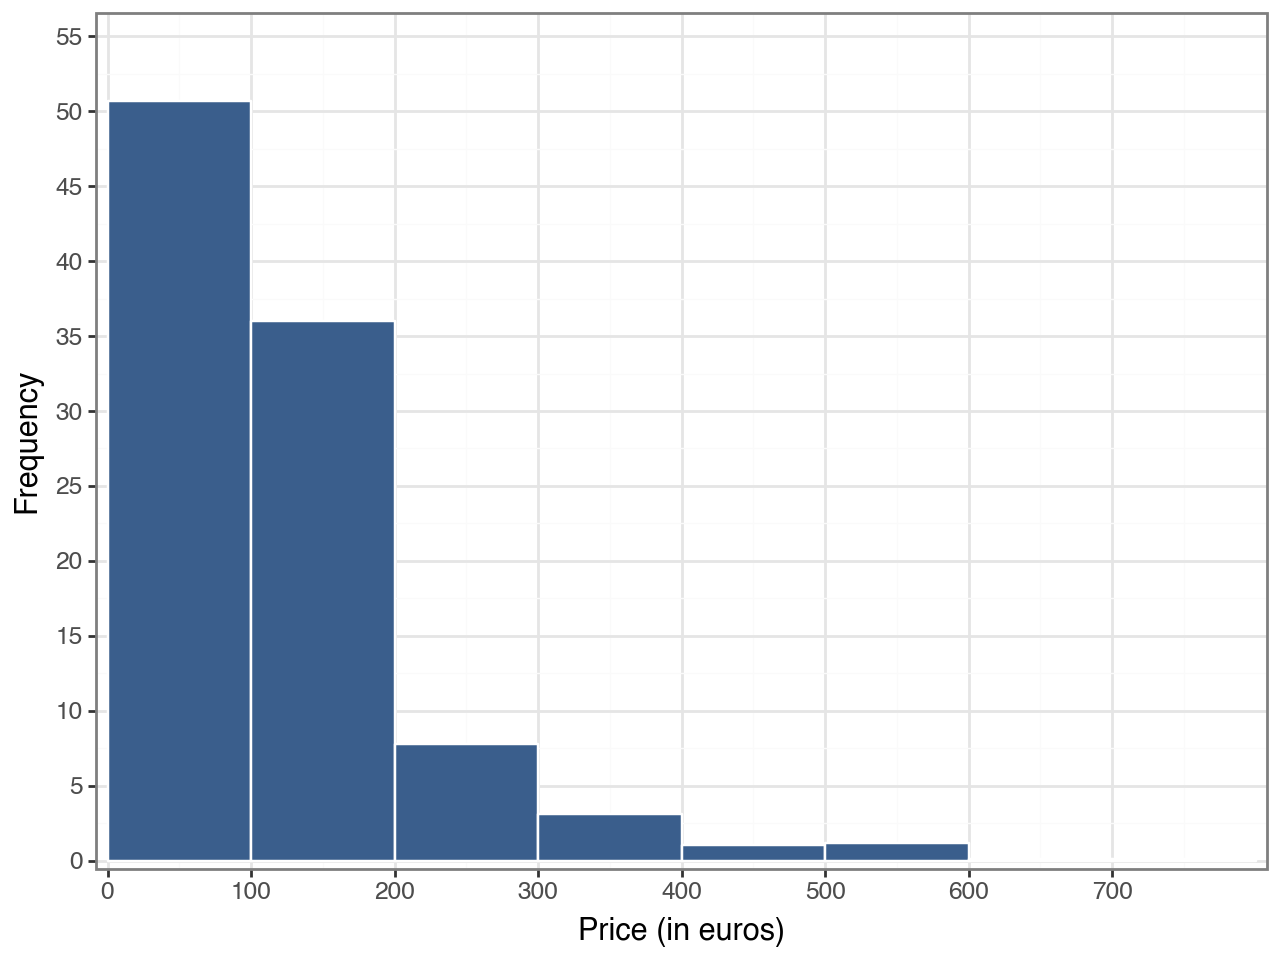

In [68]:
(
    ggplot(hotel_data, aes(x="Price_euro"))
    + geom_histogram(
        aes(y=after_stat("count / sum(count)*100")),
        binwidth=100,
        fill=color[0],
        color="white",
        boundary=0,
        closed="left",
    )
    + labs(x="Price (in euros)", y="Frequency")
    + expand_limits(x=0.01, y=0.01)
    + scale_x_continuous(expand=[0.01, 0.01], limits=[0, 800], breaks=np.arange(0, 800, 100))
    + scale_y_continuous(expand=[0.01, 0.01], limits=[0, 56], breaks=np.arange(0, 56, 5))
    + theme_bw()
)

## **Figure 4.** Average room price of hotels in 4 cities (in Euro)

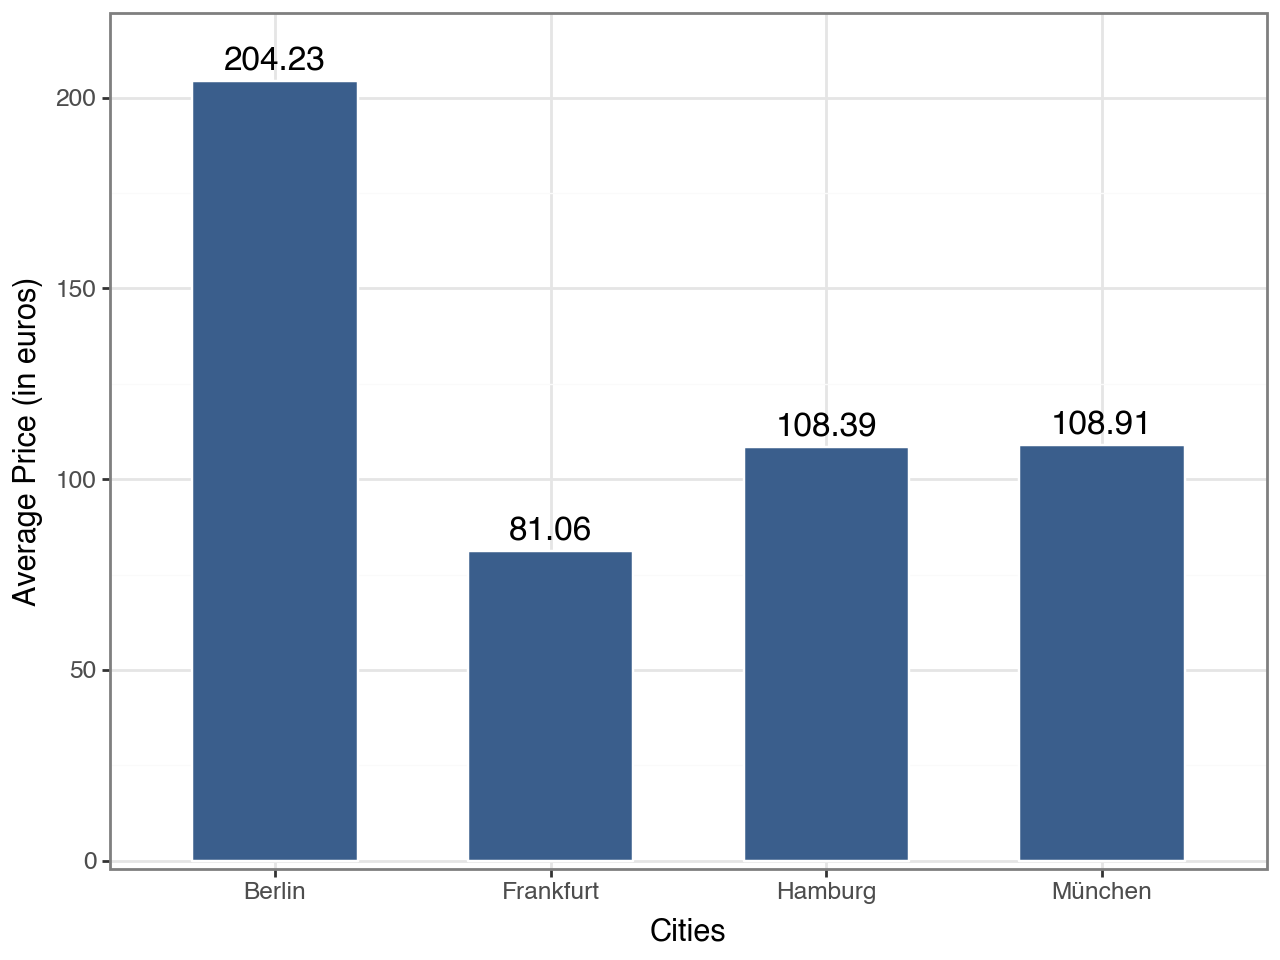

In [72]:
# Compute the average price per city
average_price = hotel_data.groupby('city')['Price_euro'].mean().reset_index()

(
    ggplot(average_price, aes(x='city', y='Price_euro', fill='city'))
    + geom_bar(stat='identity', position='dodge', width=0.6, color='white', size=0.5, alpha=0.8)
    + geom_text(
        aes(label=round(average_price['Price_euro'], 2)),  # Ensure proper access to Price_euro
        nudge_y=5,  # Adjust the vertical position of the text
        size=12     # Adjust the text size
    )
    + scale_y_continuous(expand=(0.01, 0.01), limits=[0, 220], breaks=np.arange(0, 220, 50))
    + labs(x='Cities', y='Average Price (in euros)')
    + theme_bw()
    + theme(legend_position='none')
    + scale_fill_manual(values=['#3a5e8cFF', '#3a5e8cFF', '#3a5e8cFF', '#3a5e8cFF'], name='City')
)

## **Figure 5.** Average distance from hotel to city center by cities, in km

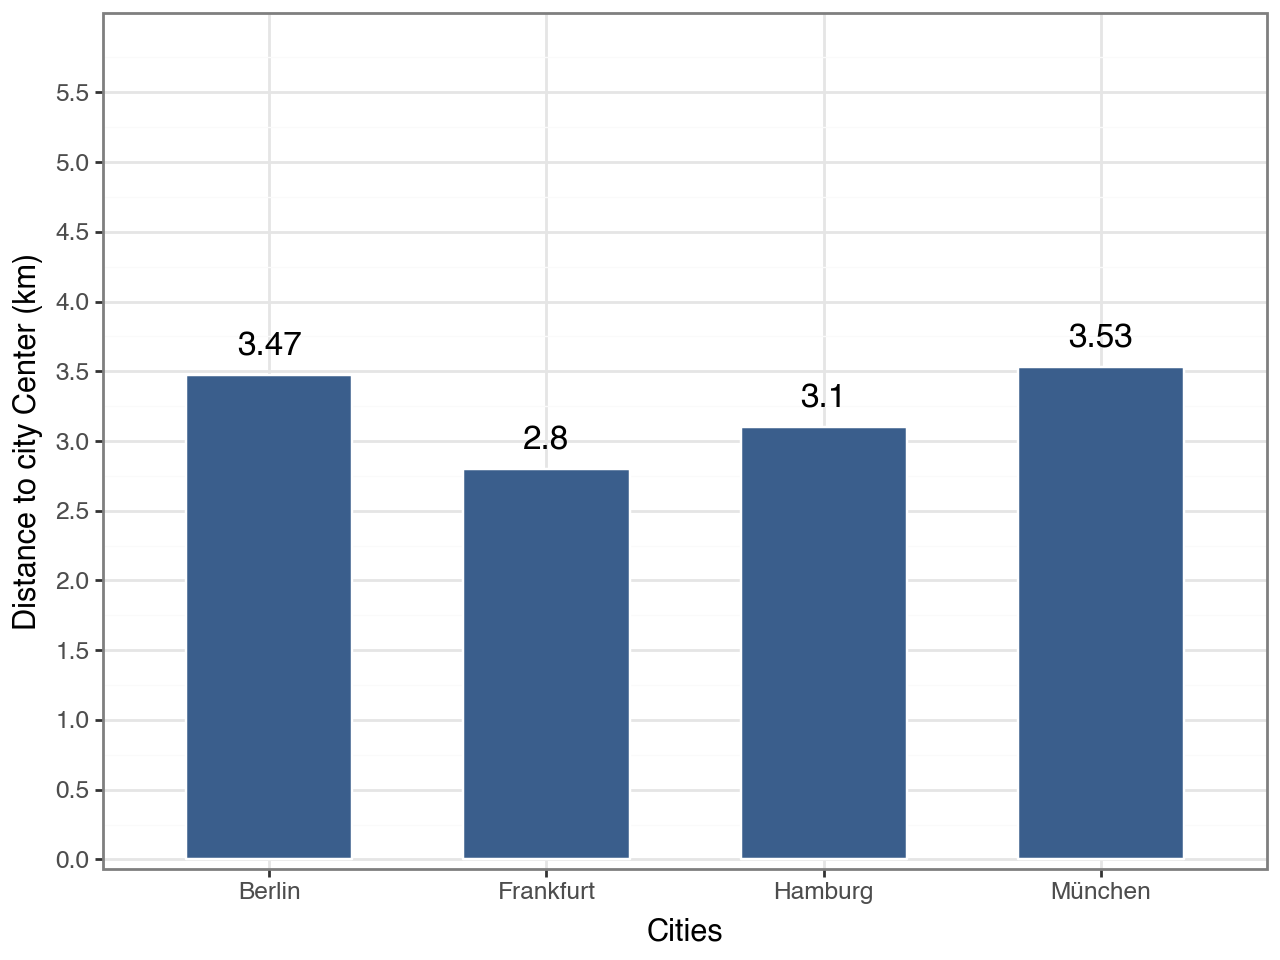

In [75]:
# Compute the average distance per city
average_distance = hotel_data.groupby('city')['distance_km'].mean().reset_index()

(
    ggplot(average_distance, aes(x='city', y='distance_km', fill='city'))
    + geom_bar(stat='identity', position='dodge', width=0.6, color='white', size=0.5, alpha=0.8)
    + geom_text(
        aes(label=round(average_distance['distance_km'], 2)),  # Ensure proper access to Price_euro
        nudge_y=0.2,  # Adjust the vertical position of the text
        size=12     # Adjust the text size
    )
    + scale_y_continuous(expand=(0.01, 0.01), limits=[0, 6], breaks=np.arange(0, 6, 0.5))
    + labs(x='Cities', y='Distance to city Center (km)')
    + theme_bw()
    + theme(legend_position='none')
    + scale_fill_manual(values=['#3a5e8cFF', '#3a5e8cFF', '#3a5e8cFF', '#3a5e8cFF'], name='City')
)

# **PART II. Regression Analysis** 

## **BERLIN**

## Summary statistics on price and distance

In [78]:
# Filter the dataset for observations from Berlin
Berlin_data = hotel_data[hotel_data['city'] == 'Berlin']

# Price
Berlin_data[['Price_euro']].describe(percentiles=[0.50,0.95])

,Price_euro
count,289.000000
mean,204.231834
std,111.973451
min,21.000000
50%,172.000000
95%,429.400000
max,618.000000


In [80]:
# Distance
Berlin_data[['distance_km']].describe(percentiles=[0.50,0.95])

,distance_km
count,289.000000
mean,3.473356
std,2.104282
min,0.200000
50%,3.100000
95%,7.660000
max,10.000000


## **Regression 1**: Close VS Far Regression with Binary Distance

In [83]:
# hotels = hotels.assign(dist2=lambda x: x.distance>=4)
Berlin_data["dist2"] = Berlin_data.distance_km.apply(lambda x: int(x>=4))

/var/folders/h3/p7wl5qls22b6g1rct6ljfgvc0000gn/T/ipykernel_77590/1039663581.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [85]:
dist2 = Berlin_data.groupby("dist2").aggregate(Eprice_cat2=("Price_euro",np.mean))

/var/folders/h3/p7wl5qls22b6g1rct6ljfgvc0000gn/T/ipykernel_77590/541342845.py:1: FutureWarning: The provided callable <function mean at 0x103b47600> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.


In [87]:
Berlin_data=Berlin_data.merge(dist2,left_on="dist2",right_on=dist2.index)

In [89]:
Berlin_data.dist2=Berlin_data.dist2.replace(0,"Close")
Berlin_data.dist2=Berlin_data.dist2.replace(1,"Far")

In [91]:
Berlin_data[["dist2","distance_km","Price_euro"]].groupby("dist2").aggregate("describe")

distance_km                                                  Price_euro  \
            count      mean       std  min  25%   50%    75%   max      count   
dist2                                                                           
Close       192.0  2.260417  0.919251  0.2  1.5  2.25  3.025   3.9      192.0   
Far          97.0  5.874227  1.684072  4.0  4.6  5.30  6.800  10.0       97.0   

                                                                  
             mean         std   min    25%    50%     75%    max  
dist2                                                             
Close  225.645833  114.790315  21.0  149.0  189.5  261.75  618.0  
Far    161.845361   93.087810  21.0  102.0  139.0  177.00  532.0

## **Figure 6**. a) Plot mean values by "Close" vs "Far"

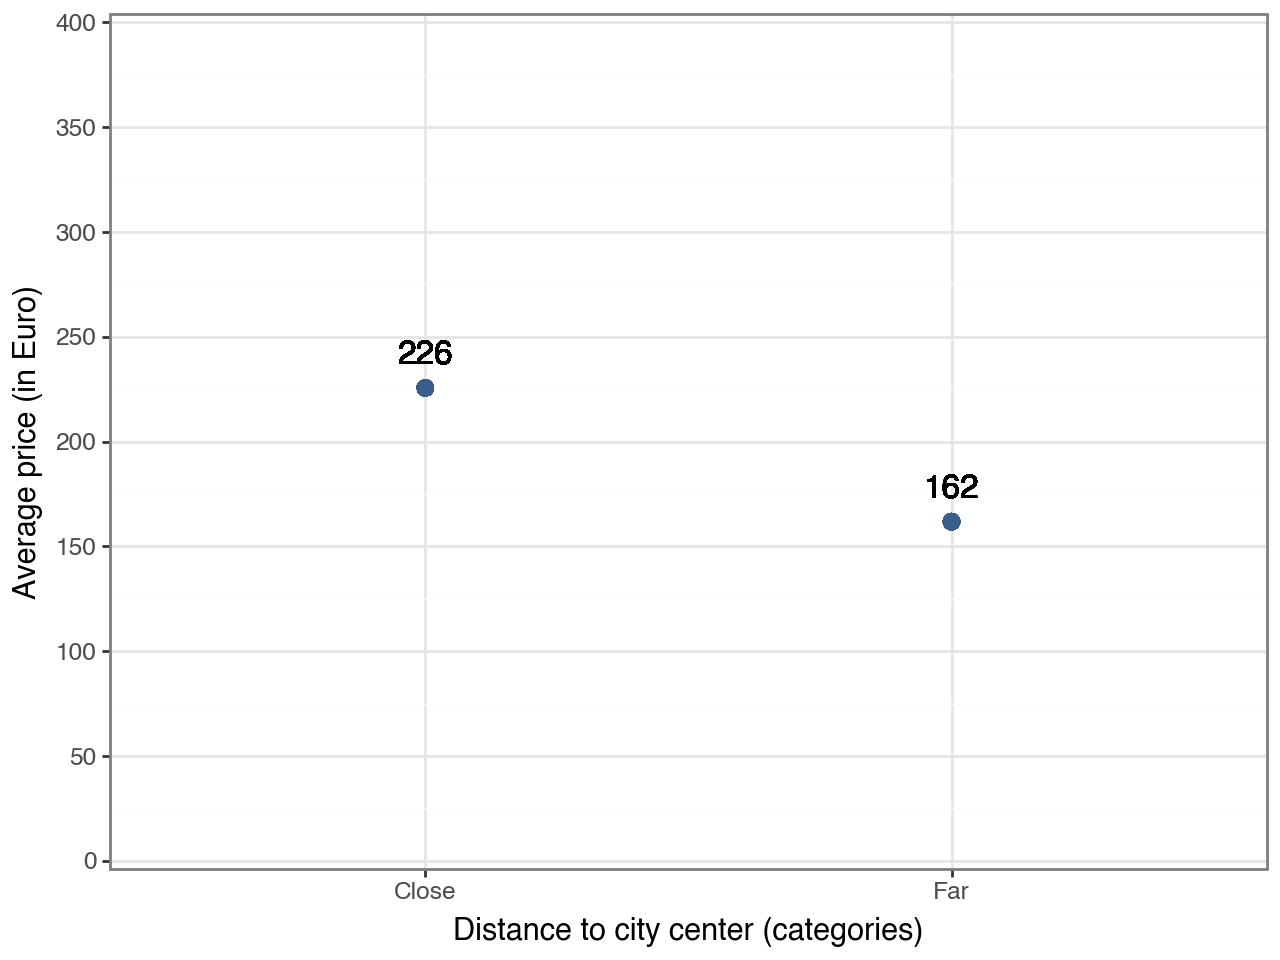

In [95]:
ggplot(Berlin_data) + geom_point(
    aes(x="dist2", y="Eprice_cat2"), size=2.5, color=color[0], fill=color[0], alpha=0.4
) + geom_text(
    aes(x="dist2", y="[x+15 for x in Eprice_cat2]", label=np.round(Berlin_data.Eprice_cat2).apply(int)),
    color="black",
    size=12,
) + scale_y_continuous(
    expand=[0.01, 0.01], limits=[0, 400], breaks=seq(0, 400, 50)
) + expand_limits(
    y=0.01
) + scale_x_discrete() + labs(
    x="Distance to city center (categories)", y="Average price (in Euro)"
) + theme_bw()

In [97]:
Berlin_data["dist10"] = Berlin_data.distance_km.apply(
    lambda x: 0.5 + 1 * int(x >= 1) + 1 * int(x >= 2) + 1 * int(x >= 3) + 1 * int(x >= 4) + 1 * (x >= 5) + 1 * (x >= 6) + 1 * (x >= 7) + 1 * (x >= 8) + 1 * (x >= 9) + 1 * (x >= 10)
)

In [99]:
dist10 = Berlin_data.groupby("dist10").aggregate(Eprice_cat10=("Price_euro", np.mean))

/var/folders/h3/p7wl5qls22b6g1rct6ljfgvc0000gn/T/ipykernel_77590/3165553596.py:1: FutureWarning: The provided callable <function mean at 0x103b47600> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.


In [101]:
Berlin_data = Berlin_data.merge(dist10, left_on="dist10", right_on=dist10.index)

In [103]:
Berlin_data[["dist10", "distance_km", "Price_euro"]].groupby("dist10").aggregate("describe")

distance_km                                                          \
             count       mean       std   min     25%    50%     75%   max   
dist10                                                                       
0.5           14.0   0.757143  0.191007   0.2   0.725   0.80   0.900   0.9   
1.5           70.0   1.492857  0.277317   1.0   1.300   1.50   1.700   1.9   
2.5           58.0   2.525862  0.274380   2.0   2.300   2.60   2.775   2.9   
3.5           50.0   3.448000  0.280117   3.0   3.200   3.40   3.700   3.9   
4.5           37.0   4.443243  0.305996   4.0   4.200   4.40   4.800   4.9   
5.5           25.0   5.352000  0.280060   5.0   5.100   5.30   5.500   5.9   
6.5           14.0   6.500000  0.288231   6.1   6.225   6.55   6.750   6.9   
7.5            7.0   7.414286  0.241030   7.1   7.250   7.40   7.600   7.7   
8.5            6.0   8.433333  0.287518   8.2   8.200   8.35   8.575   8.9   
9.5            7.0   9.728571  0.179947   9.4   9.650   9.80   9.850   9.9   
10.5           1.0  10.000000       NaN  10.0  10.000  10.00  10.000  10.0   

       Price_euro                                                               
            count        mean         std    min     25%    50%     75%    max  
dist10                                                                          
0.5          14.0  301.714286  127.265579  163.0  191.25  249.5  384.00  503.0  
1.5          70.0  212.214286   86.636822   22.0  167.50  189.0  246.00  551.0  
2.5          58.0  228.948276  116.908184   67.0  149.25  198.0  245.75  618.0  
3.5          50.0  219.320000  136.500496   21.0  134.00  165.0  288.00  597.0  
4.5          37.0  179.459459   94.401799   23.0  121.00  158.0  230.00  431.0  
5.5          25.0  190.360000  114.259164   21.0  119.00  156.0  224.00  532.0  
6.5          14.0  141.000000   79.268774   60.0   96.75  125.5  153.75  389.0  
7.5           7.0  114.428571   23.351354   89.0   95.50  117.0  124.50  155.0  
8.5           6.0  106.000000   27.085051   85.0   89.75   95.5  110.25  157.0  
9.5           7.0  114.142857   51.105866   66.0   72.50   83.0  166.50  172.0  
10.5          1.0   90.000000         NaN   90.0   90.00   90.0   90.00   90.0

## **Figure 6**. b) Plot mean values by every 1 km

/opt/anaconda3/lib/python3.12/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 1 rows containing missing values.
/opt/anaconda3/lib/python3.12/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_text : Removed 1 rows containing missing values.


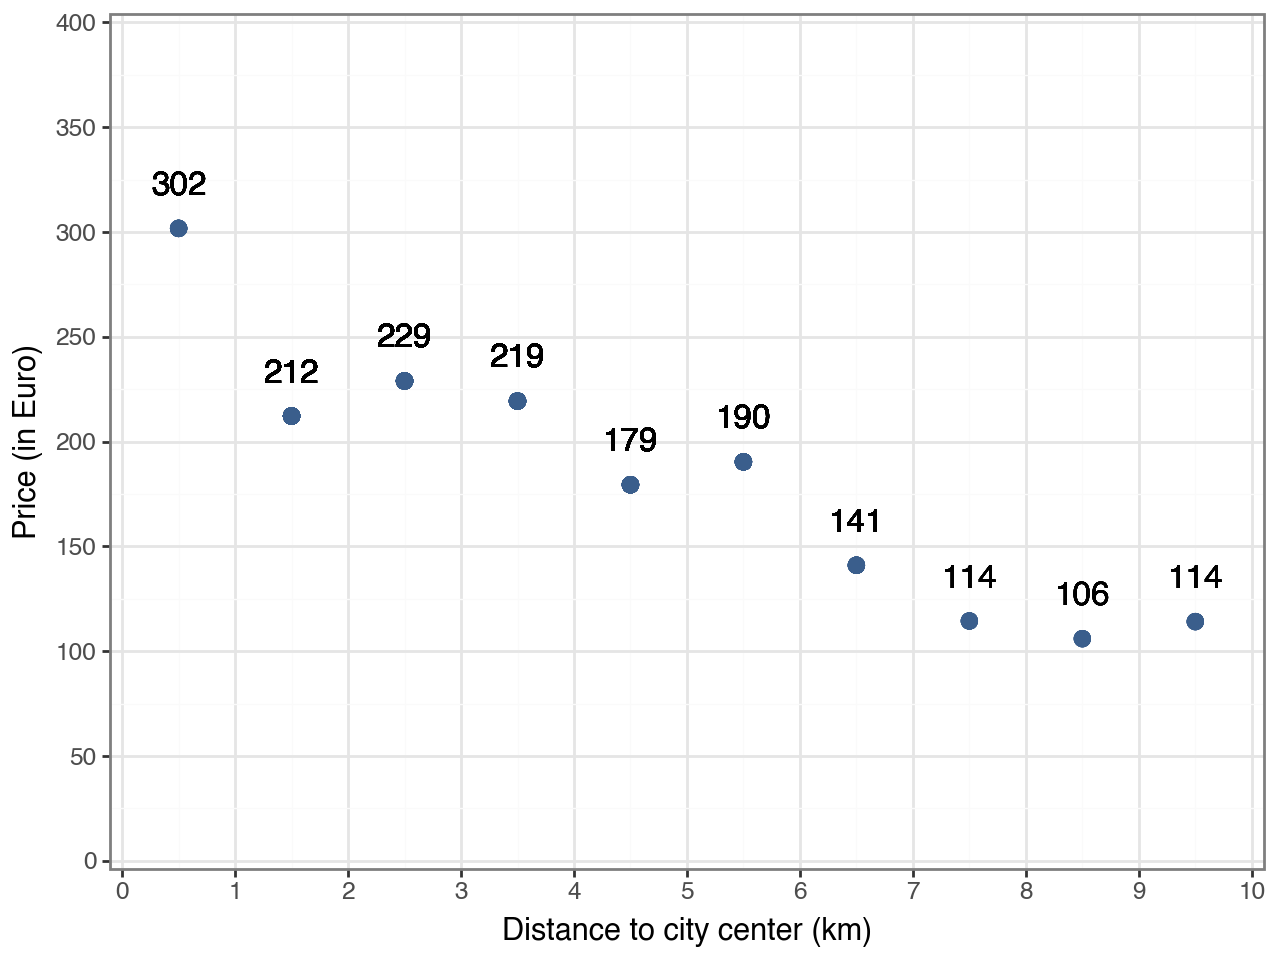

In [105]:
ggplot(data=Berlin_data) + geom_point(
    aes(x="dist10", y="Eprice_cat10"),
    size=2.5,
    color=color[0],
    fill=color[0],
    alpha=0.4,
) + geom_text(
    aes(
        x="dist10",
        y="[x+20 for x in Eprice_cat10]",
        label=np.round(Berlin_data.Eprice_cat10).apply(int),
    ),
    color="black",
    size=12,
) + expand_limits(
    x=0.01, y=0.01
) + coord_cartesian(
    xlim=[0, 10], ylim=[0, 400]
) + scale_y_continuous(
    expand=[0.01, 0.01], limits=[0, 400], breaks=seq(0, 401, 50)
) + scale_x_continuous(
    expand=[0.01, 0.01], limits=[0, 10], breaks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
) + labs(
    x="Distance to city center (km)", y="Price (in Euro)"
) + theme_bw()

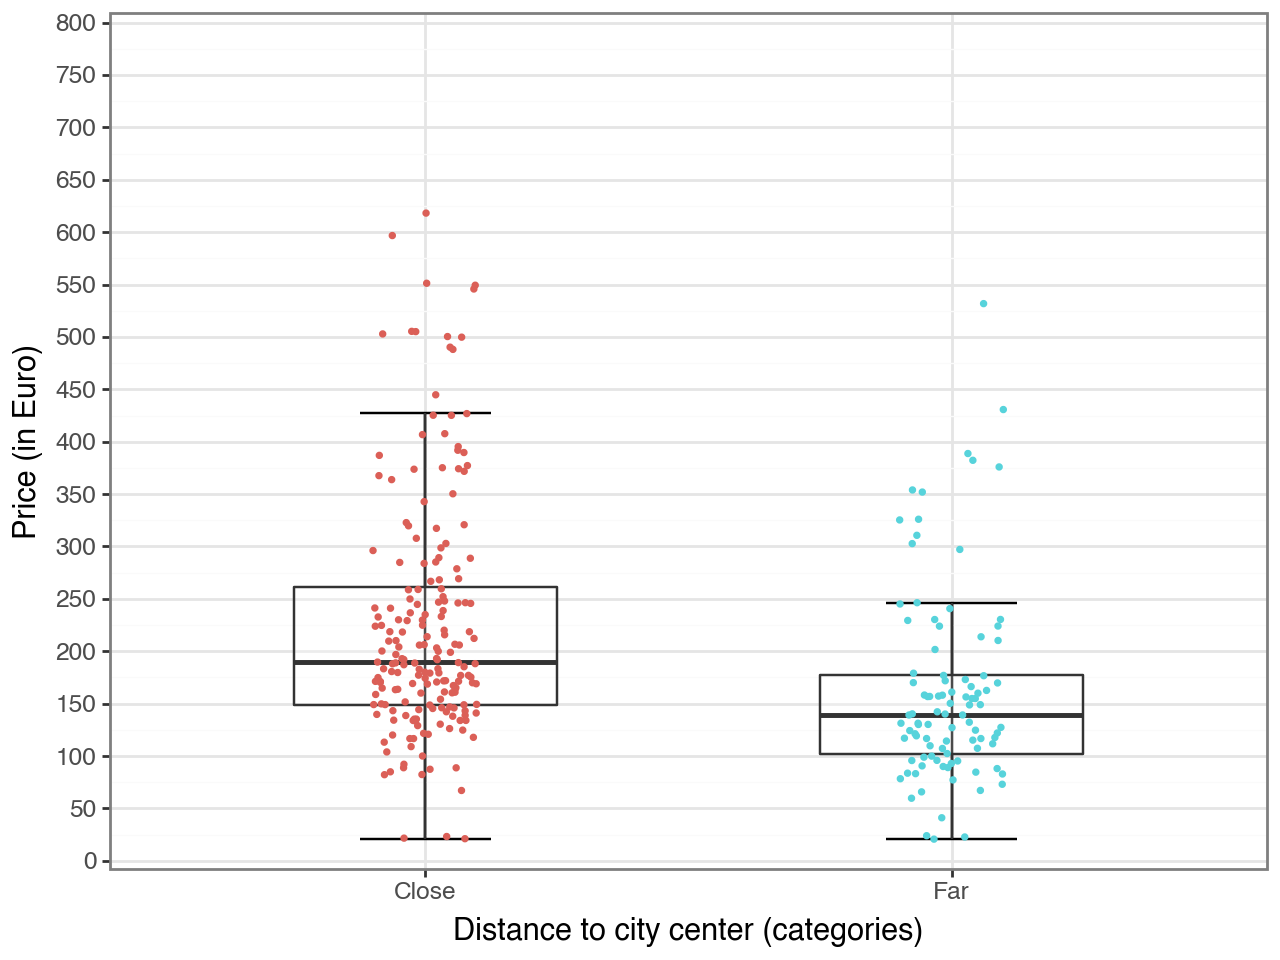

In [107]:
ggplot(Berlin_data, aes(x="dist2", y="Price_euro")) + stat_boxplot(
    aes(group="dist2"),
    geom="errorbar",
    width=0.25,
    size=0.5
) + geom_boxplot(
    aes(group="dist2"),
    size=0.5,
    width=0.5,
    alpha=0.3,
    outlier_shape="",
) + geom_jitter(
    aes(color="dist2"), position=position_jitter(0.1), size=0.5, show_legend=False
) + labs(
    x="Distance to city center (categories)", y="Price (in Euro)"
) + scale_y_continuous(
    expand=[0.01, 0.01], limits=[0, 801], breaks=seq(0, 801, 50)
) + expand_limits(
    y=0.01
) + theme_bw()

## **Figure 7.** Price and distance to the city center: non-parametric regression and scatterplot

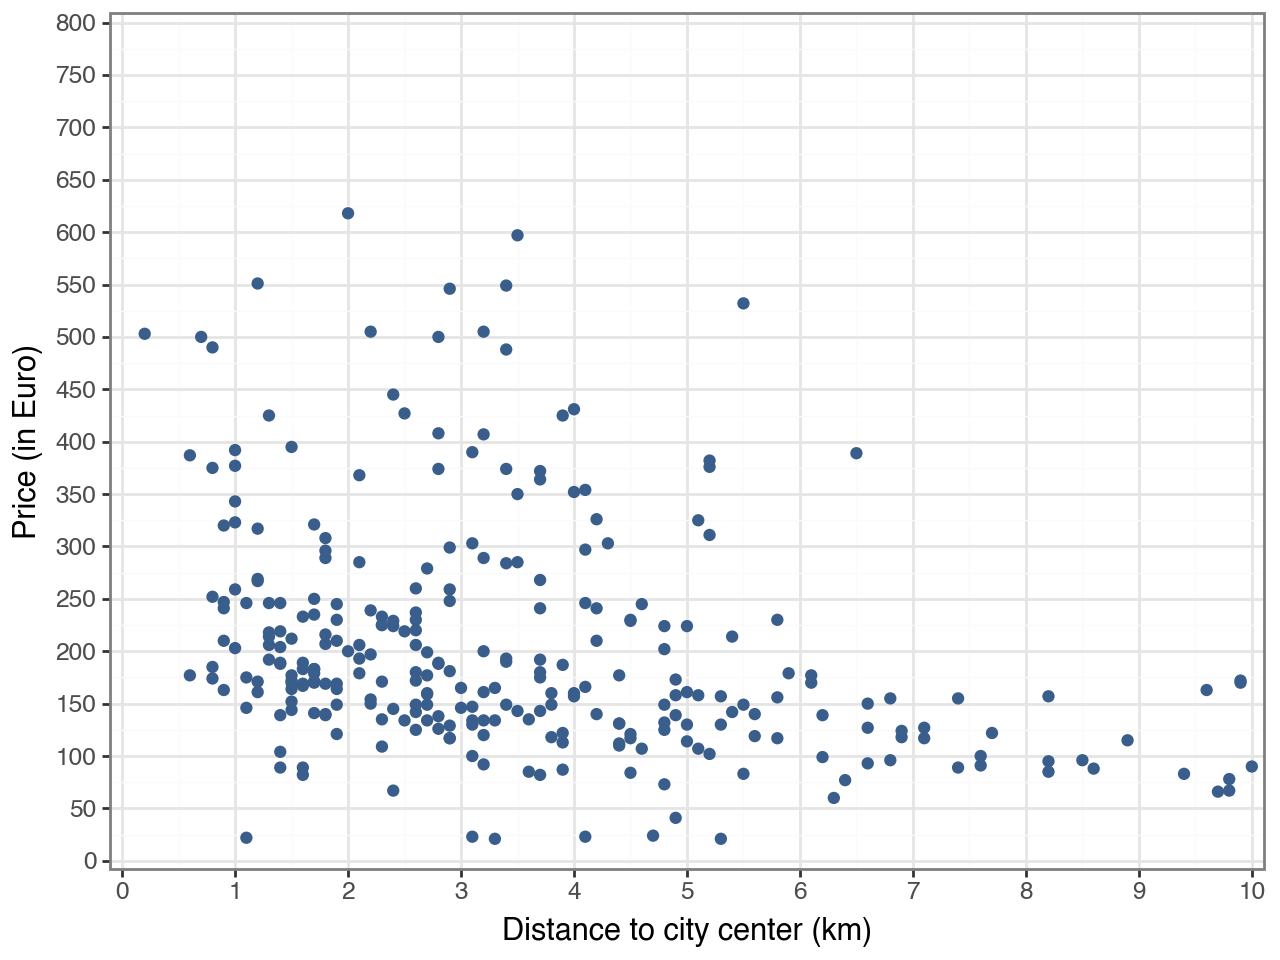

In [115]:
p1 = (
    ggplot(Berlin_data, aes(x="distance_km", y="Price_euro"))
    + geom_point(color=color[0])
    + expand_limits(x=0.01, y=0.01)
    + scale_x_continuous(expand=[0.01, 0.01], limits=[0, 10], breaks=seq(0, 10, 1))
    + scale_y_continuous(expand=[0.01, 0.01], limits=[0, 801], breaks=seq(0, 801, 50))
    + labs(x="Distance to city center (km)", y="Price (in Euro)")
    + theme_bw()
)
p1

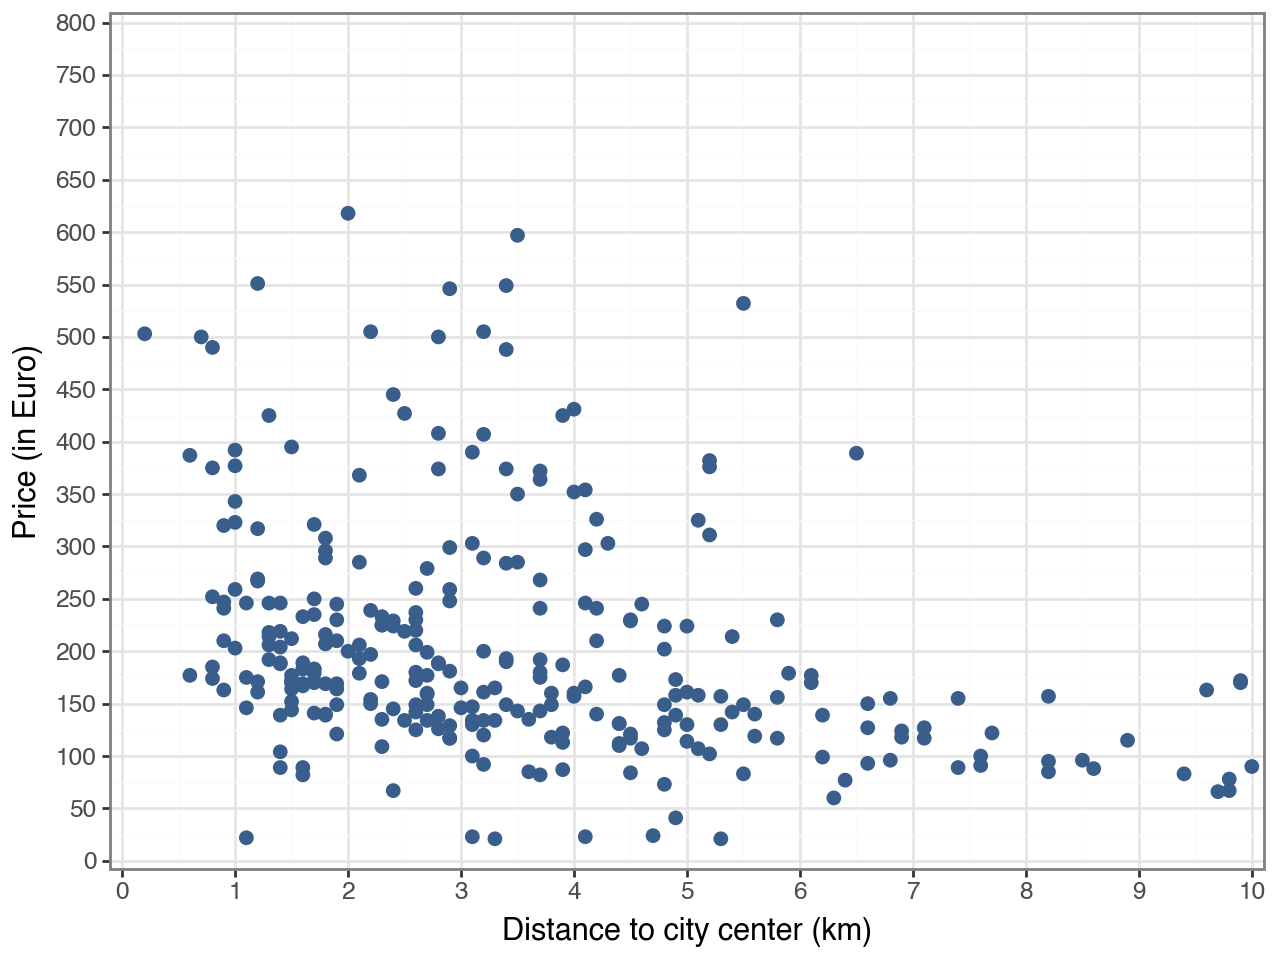

In [117]:
# large sized graphs
ggplot(Berlin_data) + geom_point(
    aes(x="distance_km", y="Price_euro"),
    color=color[0],
    size=2,
    alpha=0.5,
    show_legend=False,
    na_rm=True,
) + expand_limits(x=0.01, y=0.01) + scale_x_continuous(
    expand=[0.01, 0.01], limits=[0, 10], breaks=seq(0, 10, 1)
) + scale_y_continuous(
    expand=[0.01, 0.01], limits=[0, 801], breaks=seq(0, 801, 50)
) + labs(
    x="Distance to city center (km)", y="Price (in Euro)"
) + theme_bw()

## *Scatterplot with step function (we use 1 km bits for simpplicity using 10 bits)*

In [121]:
Berlin_data["dist10_s"] = Berlin_data.distance_km.apply(
    lambda x: 1 * int(x >= 1)
    + 1 * int(x >= 2)
    + 1 * int(x >= 3)
    + 1 * int(x >= 4)
    + 1 * int(x >= 5)
    + 1 * int(x >= 6)
    + 1 * int(x >= 7)
    + 1 * int(x >= 8)
    + 1 * int(x >= 9)
    + 1 * int(x >=10)
)
Berlin_data["xend"] = Berlin_data["dist10_s"] + 1
Berlin_data["yend"] = Berlin_data["Eprice_cat10"]

### *Non-parametric regression, 10 bins*

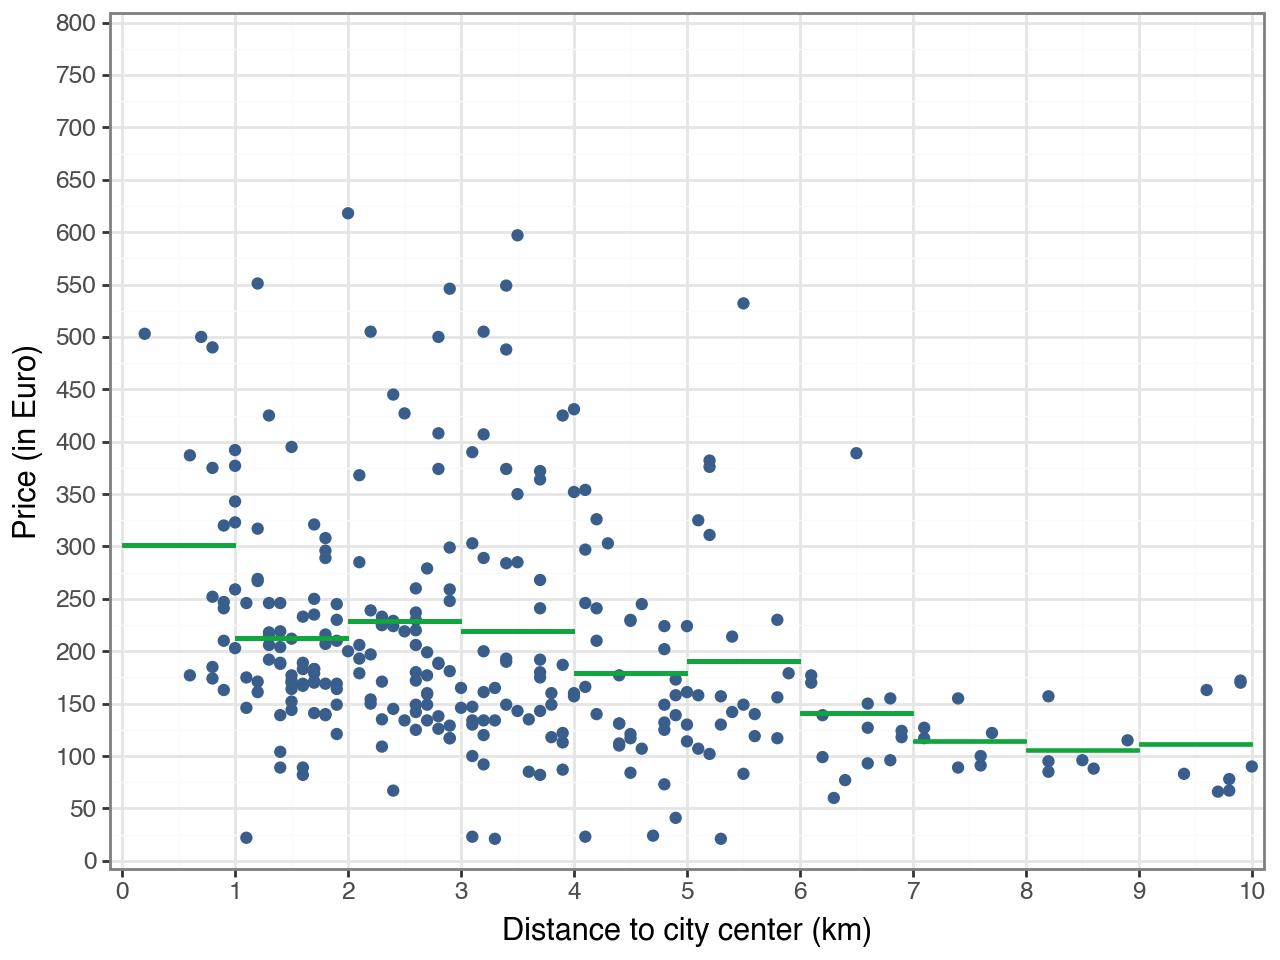

In [141]:
F07 = p1 + geom_segment(
    Berlin_data,
    aes("dist10_s", "yend", xend="xend", yend="yend"),
    color=color[1],
    size=0.7,
    na_rm=True,
)

F07

In [85]:
# !pip install scikit-misc

## **Figure 8.** Lowess Non-parametric regression

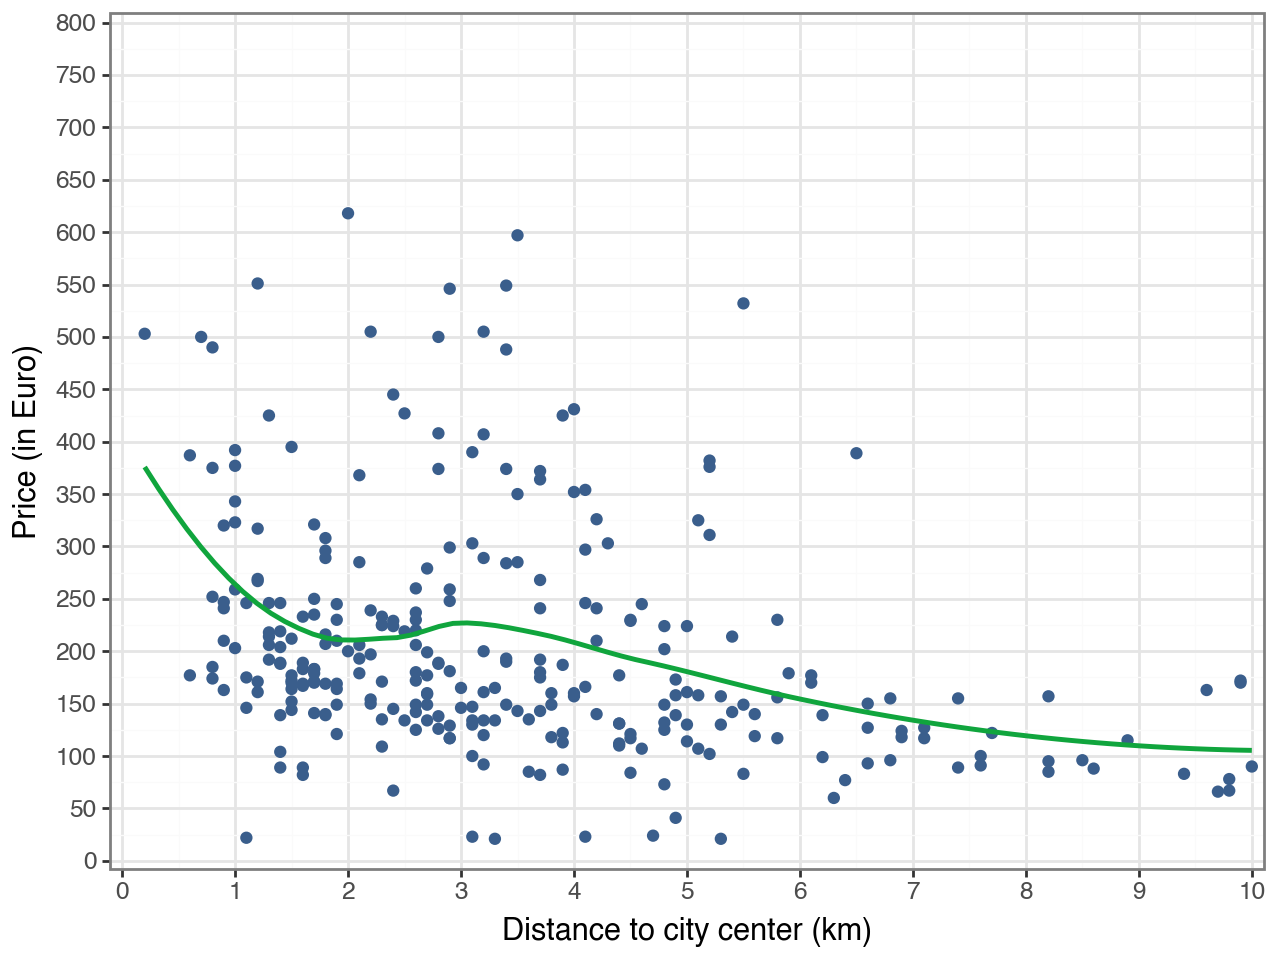

In [143]:
F08 = p1 + geom_smooth(method="loess", color=color[1],se=False)
F08

In [145]:
### LINEAR REGRESSIONS
regression = smf.ols(formula="Price_euro~distance_km", data=Berlin_data).fit()
regression.summary()
#regression.summary(slim=True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Price_euro   R-squared:                       0.104
Model:                            OLS   Adj. R-squared:                  0.101
Method:                 Least Squares   F-statistic:                     33.30
Date:                Thu, 13 Feb 2025   Prob (F-statistic):           2.04e-08
Time:                        00:25:13   Log-Likelihood:                -1757.3
No. Observations:                 289   AIC:                             3519.
Df Residuals:                     287   BIC:                             3526.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     263.8283     12.069     21.860      0.000     240.073     287.583
distance_km   -17.1582      2.973     -5.771      0.000     -23.010     -11.306
==============================================================================
Omnibus:                       74.785   Durbin-Watson:                   0.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              139.807
Skew:                           1.378   Prob(JB):                     4.38e-31
Kurtosis:                       5.005   Cond. No.                         8.20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## **Figure 9.** Scatterplot + Regression Line

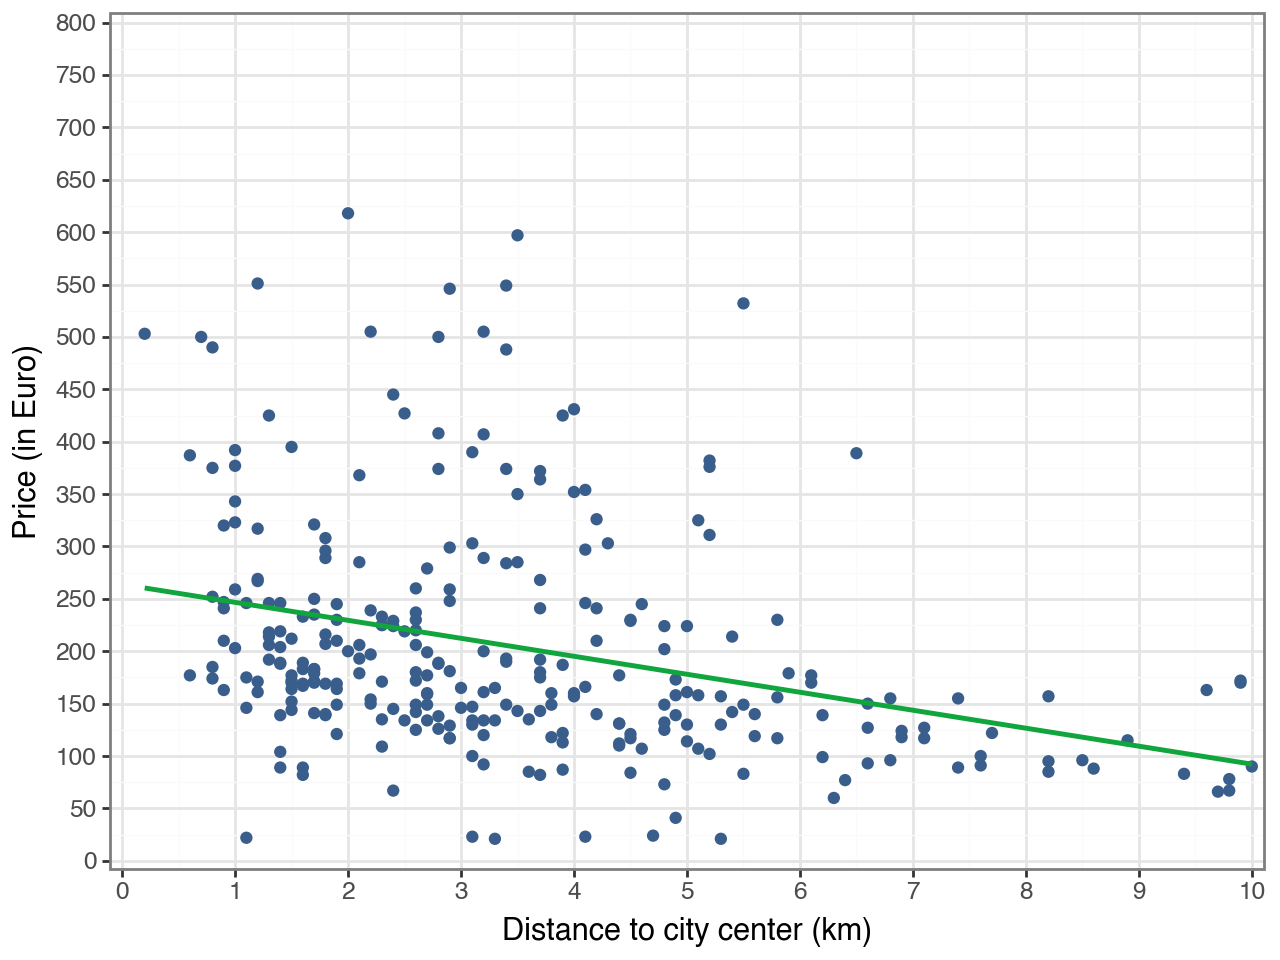

In [151]:
F09 = p1 + geom_smooth(method="lm", color=color[1],se=False)
F09

### * *The Linear regression goes through the averages. Scatterplot + Regression Line + Lines for averages*

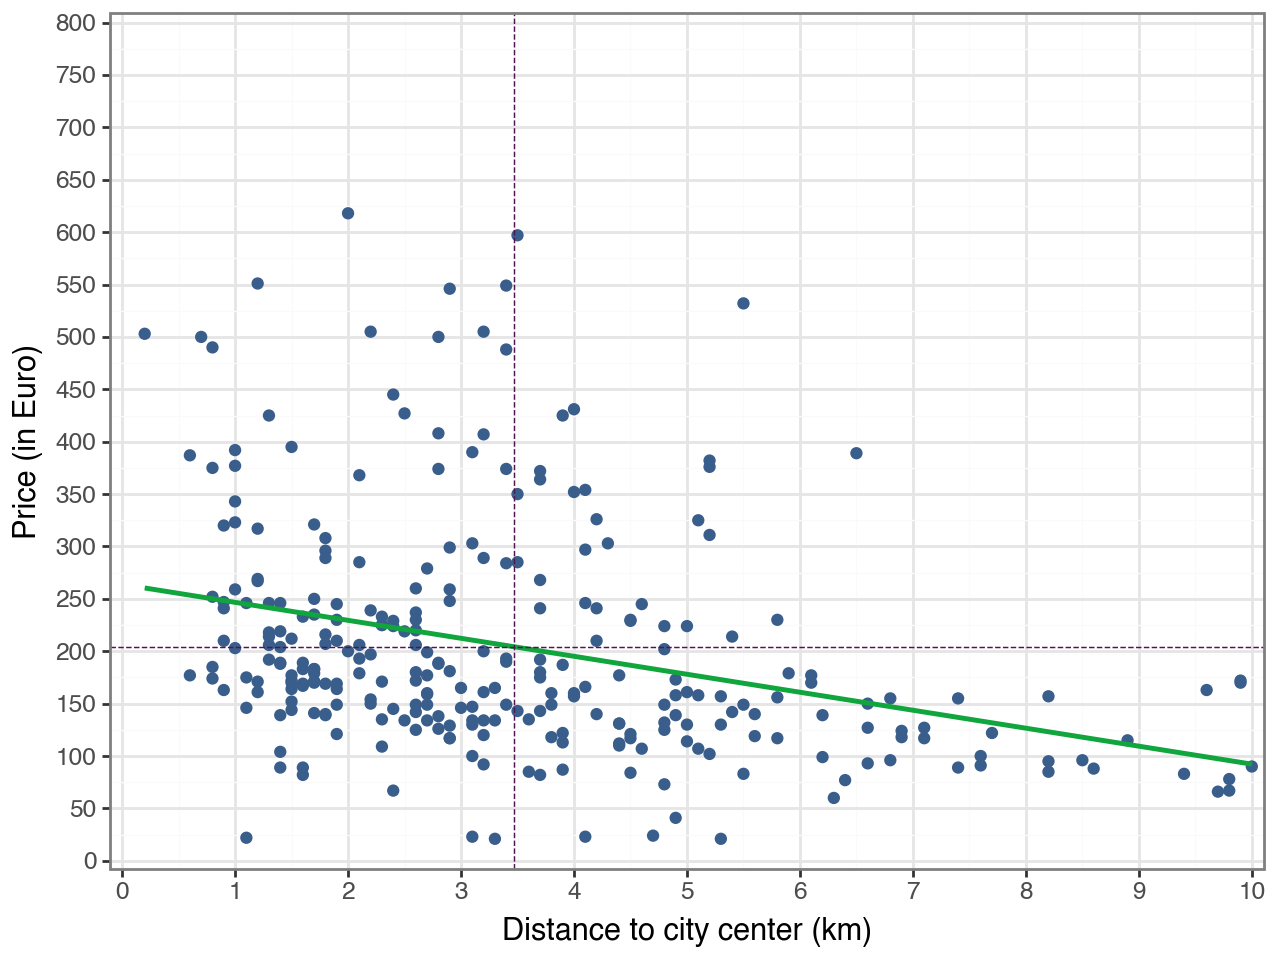

In [161]:
F09a = (
    p1
    + geom_smooth(method="lm", color=color[1],se=False)
    + geom_vline(
        xintercept=Berlin_data["distance_km"].mean(),
        color=color[2],
        linetype="dashed",
        size=0.3,
    )
    + geom_hline(
        yintercept=Berlin_data["Price_euro"].mean(), color=color[2], linetype="dashed", size=0.3
    )
)
F09a

### Predicted values and residuals of Linear regression

In [165]:
regression = smf.ols(formula="Price_euro~distance_km", data=Berlin_data).fit()

In [167]:
Berlin_data

,hotel_id,city,check_in,check_out,breakfast_0_1,accommadation_type,distance_km,Sustain_cert,reviews_0_10,nr_reviews,...,dist2,Eprice_cat2,dist10,Eprice_cat10,dist10_s,xend,yend,dist7_new,Eprice_cat7_new,dist7_s
0,1,Berlin,2/5/2025,2/6/2025,0,Hotel,2.9,0,8.2,3159,...,Close,225.645833,2.5,228.948276,2,3,228.948276,3.5,228.948276,2
1,3,Berlin,2/5/2025,2/6/2025,0,Hotel,7.4,0,8.7,44,...,Far,161.845361,7.5,114.428571,7,8,114.428571,8.5,114.428571,7
2,5,Berlin,2/5/2025,2/6/2025,0,Hotel,3.9,0,8.5,23837,...,Close,225.645833,3.5,219.320000,3,4,219.320000,4.5,219.320000,3
3,9,Berlin,2/5/2025,2/6/2025,0,Hotel,3.8,0,8.4,7916,...,Close,225.645833,3.5,219.320000,3,4,219.320000,4.5,219.320000,3
4,10,Berlin,2/5/2025,2/6/2025,0,Hotel,5.6,1,8.3,9294,...,Far,161.845361,5.5,190.360000,5,6,190.360000,6.5,190.360000,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,431,Berlin,2/5/2025,2/6/2025,0,Aparthotel,5.0,0,8.2,603,...,Far,161.845361,5.5,190.360000,5,6,190.360000,6.5,190.360000,5
285,441,Berlin,2/5/2025,2/6/2025,0,Hotel,2.8,0,8.4,5911,...,Close,225.645833,2.5,228.948276,2,3,228.948276,3.5,228.948276,2
286,450,Berlin,2/5/2025,2/6/2025,0,Hotel,3.4,0,8.7,5824,...,Close,225.645833,3.5,219.320000,3,4,219.320000,4.5,219.320000,3
287,460,Berlin,2/5/2025,2/6/2025,0,Hotel,2.0,1,8.6,2398,...,Close,225.645833,2.5,228.948276,2,3,228.948276,3.5,228.948276,2


In [169]:
Berlin_data["predprice"] = regression.predict()
Berlin_data["e"] = regression.resid

In [171]:
type(regression)

statsmodels.regression.linear_model.RegressionResultsWrapper

In [185]:
xa= 5.4
ya= 158
ym= 215 
# FIXME
# ym  --should be replaced with predicted value directly

/opt/anaconda3/lib/python3.12/site-packages/plotnine/scales/scales.py:48: PlotnineWarning: Scale for 'x' is already present.
Adding another scale for 'x',
which will replace the existing scale.

/opt/anaconda3/lib/python3.12/site-packages/plotnine/scales/scales.py:48: PlotnineWarning: Scale for 'y' is already present.
Adding another scale for 'y',
which will replace the existing scale.

/opt/anaconda3/lib/python3.12/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 20 rows containing missing values.


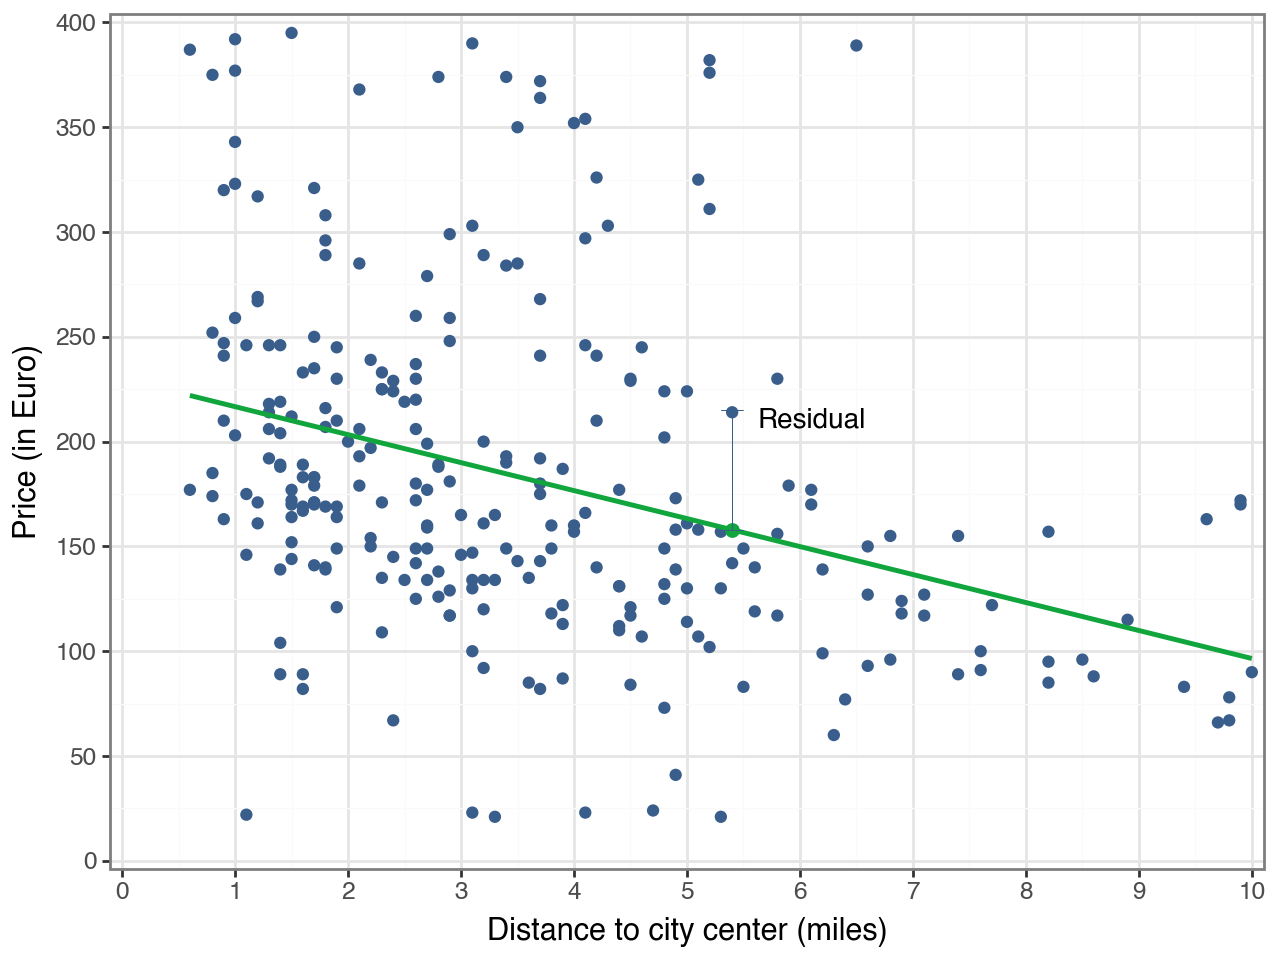

In [197]:
F09b = (
    p1
    + geom_smooth(method="lm", color=color[1], se=False)
    + annotate(
        "text",
        x=6.1,
        y=210,
        label="Residual",
        size=10,
    )
    + annotate("pointrange", x=xa, y=ya, ymin=ya, ymax=ya, color=color[1], size=0.5)
    + geom_errorbar(
        Berlin_data.loc[Berlin_data["distance_km"] == xa],
        aes(x="distance_km", ymin=ym, ymax=ya),
        width=0.2,
        size=0.2,
        color=color[0],
    )
    + expand_limits(x=0.01, y=0.01)
    + scale_x_continuous(expand=(0.01, 0.01), limits=(0, 10), breaks=seq(0, 10, by=1))
    + scale_y_continuous(
        expand=(0.01, 0.01), limits=(0, 400), breaks=seq(0, 400, by=50)
    )
    + labs(x="Distance to city center (miles)", y="Price (in Euro)")
    + theme_bw()
)

F09b

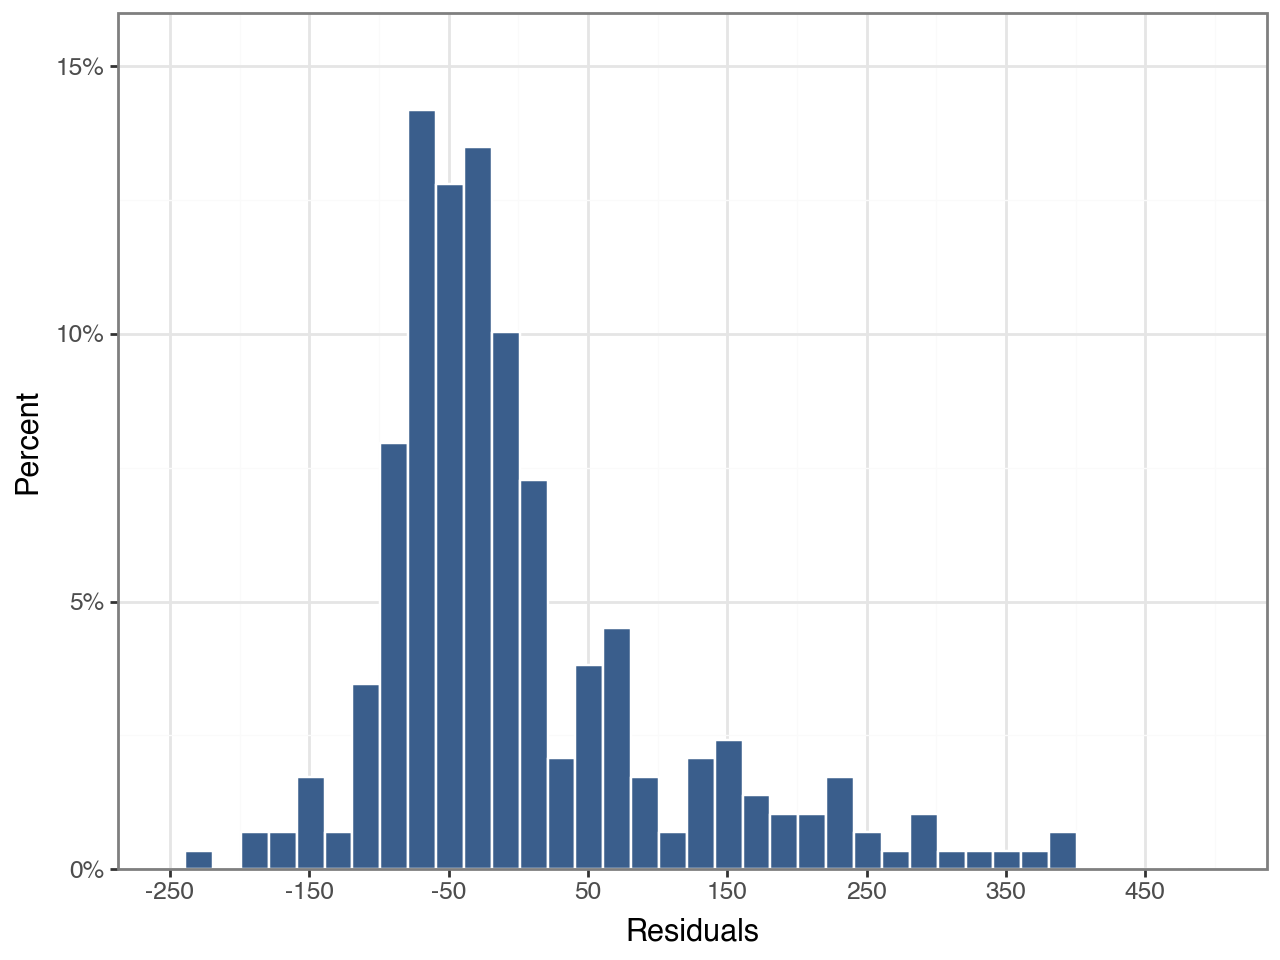

In [221]:
# histogram of residuals
F09c = ggplot(Berlin_data, aes(x="e")) + geom_histogram(
    aes(y="(..count..)/sum(..count..)"),
    binwidth=20,
    boundary=1,
    fill=color[0],
    color="white",
    alpha=0.8,
    show_legend=False,
    na_rm=True,
) + labs(x="Residuals", y="Percent") + scale_x_continuous(
    limits=(-250, 500), breaks=seq(-250, 500, by=100)
) + scale_y_continuous(
    expand=(0, 0), limits=(0, 0.16), breaks=seq(0, 0.16, by=0.05), labels=percent_format()
) + theme_bw()

F09c

In [223]:
Berlin_data["reg1_res"] = ["overpriced" if e >= 0 else "underpriced" for e in Berlin_data["e"]]

In [225]:
Berlin_data.loc[Berlin_data["e"].sort_values().tail().index, "reg1_res"] = "top5"
Berlin_data.loc[Berlin_data["e"].sort_values().head().index, "reg1_res"] = "bottom5"

In [227]:
bestdeals = Berlin_data.loc[Berlin_data["e"].sort_values().head().index]

## **Figure 10.** Underpriced hotels in Berlin

In [ ]:
### Figure 10
### adding annotation

/opt/anaconda3/lib/python3.12/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 15 rows containing missing values.
/opt/anaconda3/lib/python3.12/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 5 rows containing missing values.


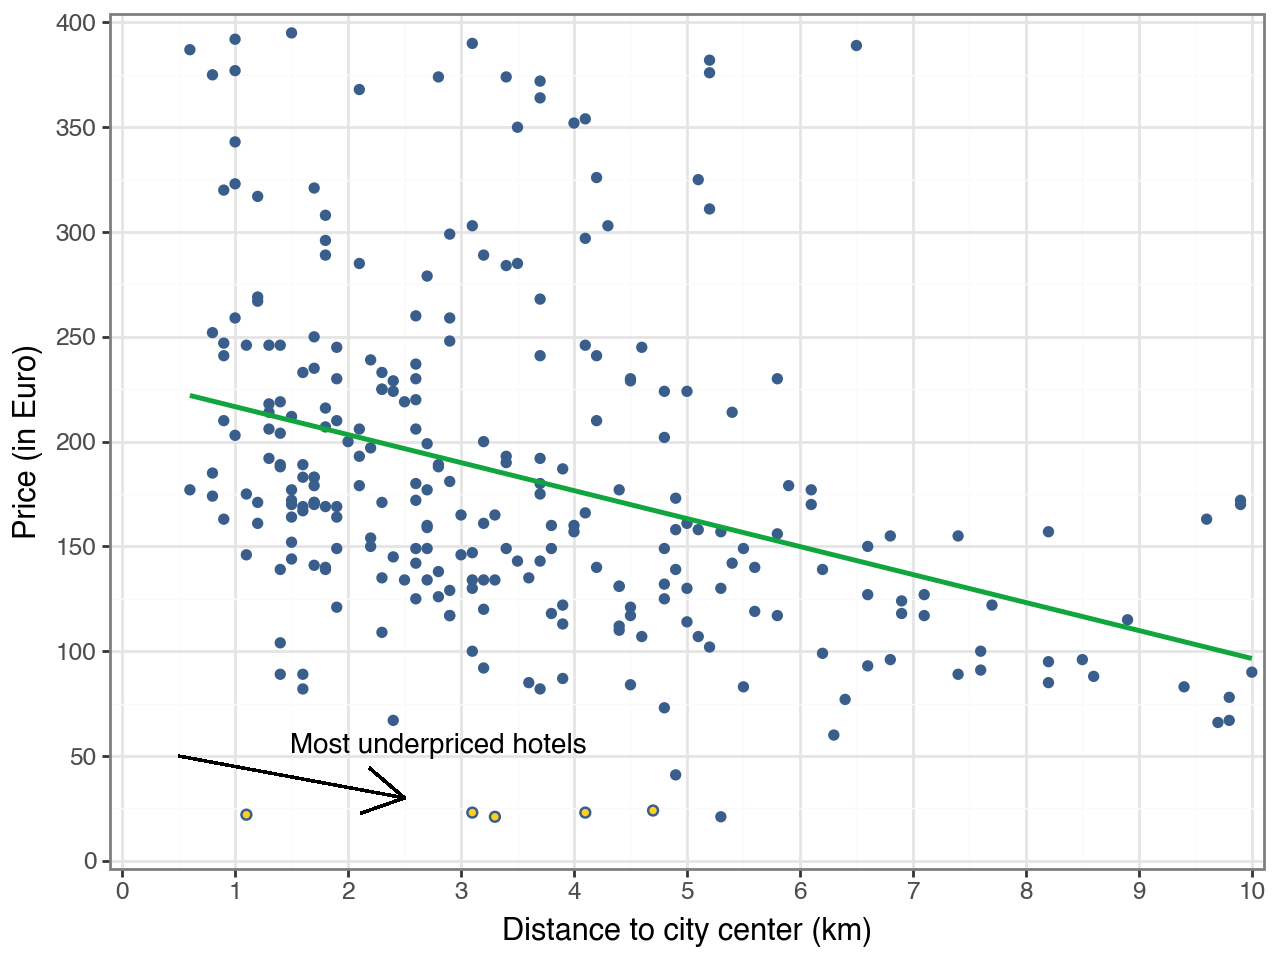

In [276]:
ggplot(Berlin_data, aes(x="distance_km", y="Price_euro")) + geom_point(
    Berlin_data.loc[Berlin_data["reg1_res"] == "overpriced"],
    aes(color="reg1_res"),
    size=1.3,
    alpha=0.6,
    show_legend=False,
) + geom_point(
    Berlin_data.loc[Berlin_data["reg1_res"] == "underpriced"],
    aes(color="reg1_res"),
    size=1.3,
    alpha=0.6,
    show_legend=False,
) + geom_point(
    Berlin_data.loc[Berlin_data["reg1_res"] == "bottom5"],
    aes(color="reg1_res", fill="reg1_res"),
    size=1.5,
    alpha=0.8,
    show_legend=False,
) + geom_point(
    Berlin_data.loc[Berlin_data["reg1_res"] == "top5"],
    aes(color="reg1_res"),
    size=1.3,
    alpha=0.6,
    show_legend=False,
) + geom_smooth(
    method="lm", size=1, color=color[1], se=False
) + coord_cartesian(
    xlim=(0, 10), ylim=(0, 400)
) + expand_limits(
    x=0.01, y=0.01
) + scale_x_continuous(
    expand=(0.01, 0.01), limits=(0, 10), breaks=seq(0, 10, by=1)
) + scale_y_continuous(
    expand=(0.01, 0.01), limits=(0, 400), breaks=seq(0, 401, by=50)
) + labs(
    x="Distance to city center (km)", y="Price (in Euro)"
) + scale_color_manual(
    name="", values=(color[0], color[0], color[0], color[0])
) + scale_fill_manual(
    name="", values=color[3]
) + annotate(
    "text", x=2.8, y=55, label="Most underpriced hotels", size=10
) + geom_segment(
    aes(x=0.5, y=50, xend=2.5, yend=30), arrow=arrow()
) + theme_bw()

## **Table 5.** Most underpriced hotels in Berlin 

In [279]:
Berlin_data.loc[
    Berlin_data["reg1_res"] == "bottom5",
    ["hotel_id", "distance_km", "Price_euro", "predprice", "e"],
].sort_values(by=["e"]).round(2).reset_index(drop=True).rename(
    {"e": "residual"}, axis=1
)

,hotel_id,distance_km,Price_euro,predprice,residual
0,81,1.1,22,244.95,-222.95
1,334,3.1,23,210.64,-187.64
2,295,3.3,21,207.21,-186.21
3,269,4.1,23,193.48,-170.48
4,298,4.7,24,183.18,-159.18
